<a href="https://colab.research.google.com/github/Mtorsha/Mtorsha/blob/main/571_AI_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Final Project - **Loan Prediction**

CS 571 AI - Prof Gutta - Spring 2022

Project: Loan Prediction uisng 3 ML algorithms

Authors: Adriana Caetano & Torsha Mazumdar

Shareable link: https://colab.research.google.com/drive/1k_22O2hy08qQq-9lda0i82zpfqqpvgtI?usp=sharing


Outputs are best seen in the colab notebook.

## STEP 1 - Basic Description of Dataset (features and labels)

The Loan Eligibible dataset can be downloaded from Kaggle. It has 614 unique values 

Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. 

\
Attributes of the Loan Elegible Dataset:

1. Loan_ID:	Unique Loan ID

2. Gender:	Male/ Female

3. Married	Applicant: married (Y/N)

4. Dependents:	Number of dependents

5. Education	Applicant: Education (Graduate/ Under Graduate)

6. Self_Employed:	Self-employed (Y/N)

7. ApplicantIncome:	Applicant income

8. CoapplicantIncome:	Coapplicant income

9. LoanAmount:	Loan amount in thousands

10. Loan_Amount_Term:	Term of a loan in months

11. Credit_History:	credit history meets guidelines

12. Property_Area:	Urban/ Semi-Urban/ Rural

\
Target:

* Loan_Status:	Loan approved (Y/N)


In [ ]:
# upload loan dataset from google drive 
from google.colab import files
uploaded = files.upload()

#drive.mount('/content/drive')

Saving loan-train.csv to loan-train.csv


In [ ]:
import csv
import pandas as pd

file_train = '/content/drive/My Drive/Colab Notebooks/AI_571/archive/loan-train.csv'
file_test = '/content/drive/My Drive/Colab Notebooks/AI_571/archive/loan-test.csv'

loan_df = pd.read_csv('loan-train.csv', sep=',')

loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Loan dataset info

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Loan dataset stats

loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Missing values

print(loan_df.isnull().sum())
print("\nTotal missing values: ", loan_df.isnull().sum().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Total missing values:  149


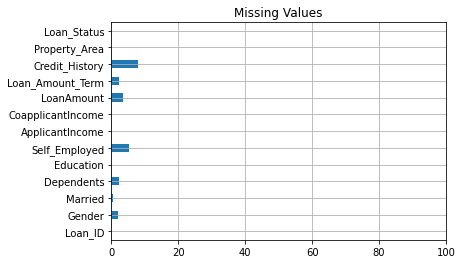

In [ ]:
import matplotlib.pyplot as plt

plt.title("Missing Values")
(1e2 * loan_df.isnull().sum()/len(loan_df)).plot(kind='barh')
plt.xlim(0, 10**2)
plt.grid();

In [ ]:
# Count unique values

loan_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Loan Status count:
 Y    422
N    192
Name: Loan_Status, dtype: int64

The percentage of Y class : 0.69
The percentage of N class : 0.31


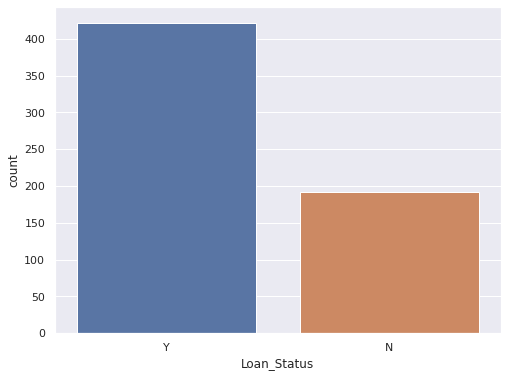

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x='Loan_Status', data=loan_df);


print("Loan Status count:\n",loan_df.Loan_Status.value_counts())

print('\nThe percentage of Y class : %.2f' % (loan_df['Loan_Status'].value_counts()[0] / len(loan_df)))
print('The percentage of N class : %.2f' % (loan_df['Loan_Status'].value_counts()[1] / len(loan_df)))

Gender count:
 Male      489
Female    112
Name: Gender, dtype: int64


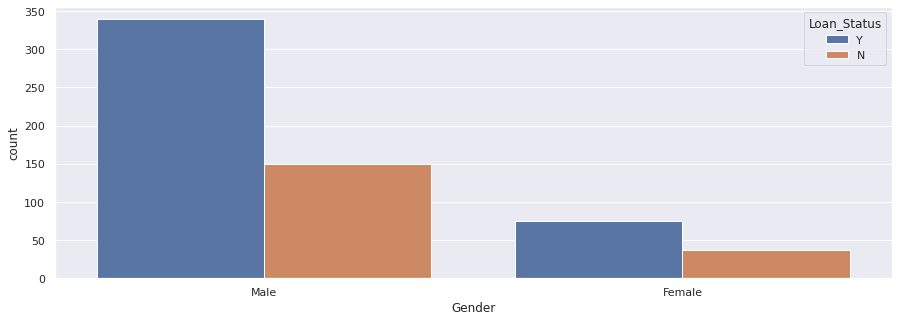

In [ ]:
# Gender

plt.figure(figsize=(15,5))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_df);

print("Gender count:\n",loan_df.Gender.value_counts())

# male_yes = (loan_df['Gender']=='Male').value_counts() /  loan_df['Loan_Status']=='Y').value_counts()

# print('\nThe percentage of Male class : %.2f' % male_yes )
# print('The percentage of Female class : %.2f' % ((loan_df['Gender']=='Female' & loan_df['Loan_Status']=='Y').value_counts()[1]) / len(loan_df['Gender'] == 'Female'))

Married count:
 Yes    398
No     213
Name: Married, dtype: int64


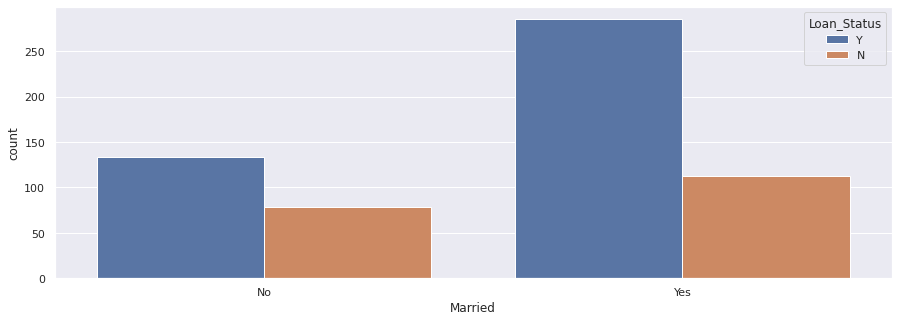

In [ ]:
# Married

print("Married count:\n",loan_df.Married.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=loan_df);

Dependents count:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


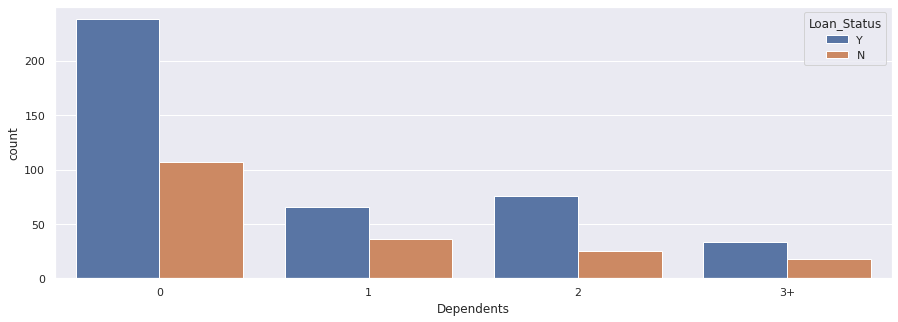

In [ ]:
# Dependents

print("Dependents count:\n",loan_df.Dependents.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_df);

Education count:
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


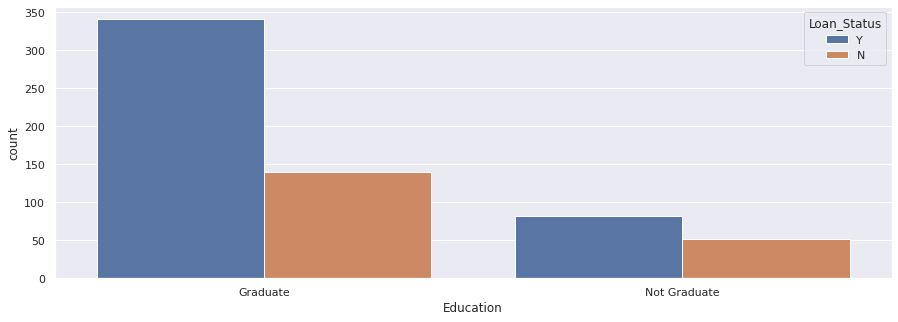

In [ ]:
# Education

print("Education count:\n",loan_df.Education.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Education', hue='Loan_Status', data=loan_df);

Sels-Emplyed count:
 No     500
Yes     82
Name: Self_Employed, dtype: int64


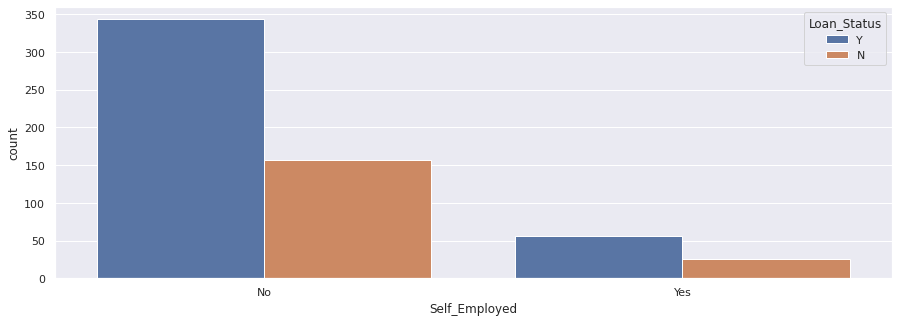

In [ ]:
# Self-Employed

print("Sels-Emplyed count:\n",loan_df.Self_Employed.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df);

Applicant Income count:
 count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


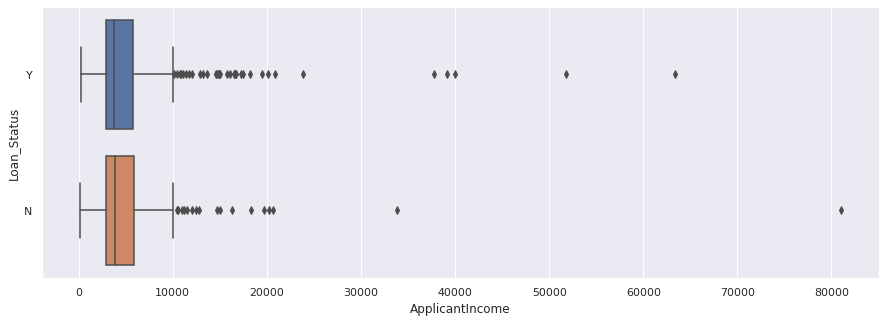

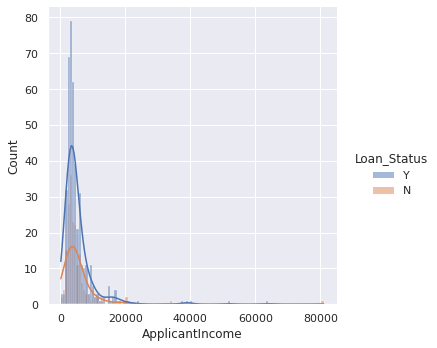

In [ ]:
# Applicant Income

print("Applicant Income count:\n",loan_df.ApplicantIncome.describe())

plt.figure(figsize=(15,5))
sns.boxplot(x=loan_df['ApplicantIncome'], y=loan_df['Loan_Status'])
sns.displot(loan_df, x="ApplicantIncome", kde=True, hue='Loan_Status', fill=True)
#plt.scatter(loan_df['ApplicantIncome'], loan_df['Loan_Status']);

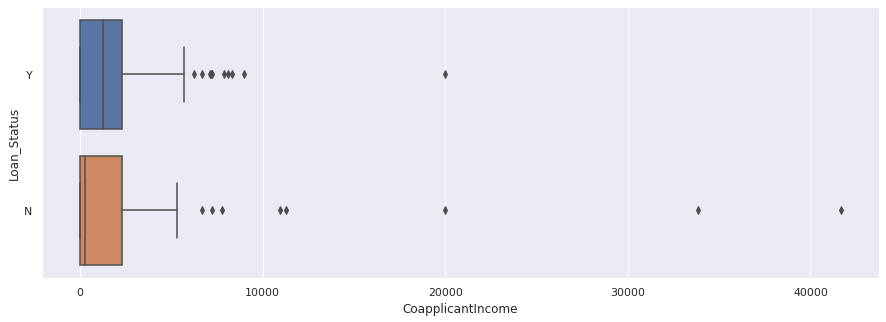

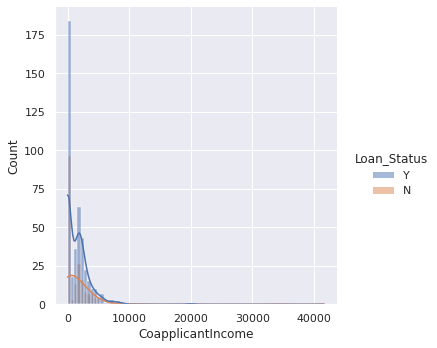

In [ ]:
# Co-applicant Income

plt.figure(figsize=(15,5))
#plt.scatter(loan_df['CoapplicantIncome'], loan_df['Loan_Status']);
sns.boxplot(x=loan_df['CoapplicantIncome'], y=loan_df['Loan_Status'])
sns.displot(loan_df, x="CoapplicantIncome", kde=True, hue='Loan_Status', fill=True) #bw_adjust=.25


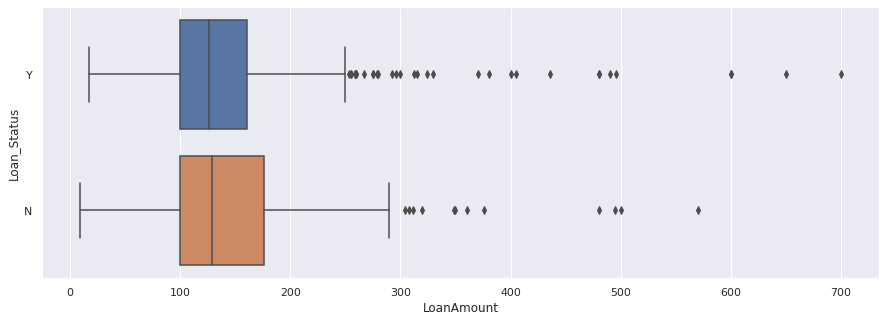

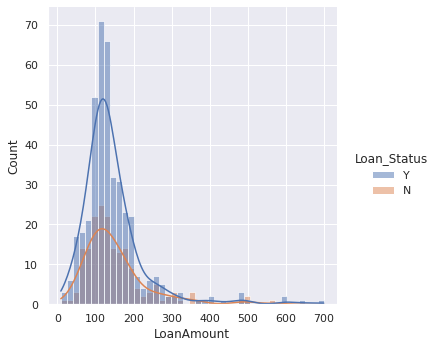

In [ ]:
# Loan Amount

plt.figure(figsize=(15,5))

sns.boxplot(x=loan_df['LoanAmount'], y=loan_df['Loan_Status'])
#sns.displot(loan_df, x="LoanAmount", kind="kde", hue='Loan_Status')
sns.displot(loan_df, x="LoanAmount", kde=True, hue='Loan_Status', fill=True)

 Loan term count:
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


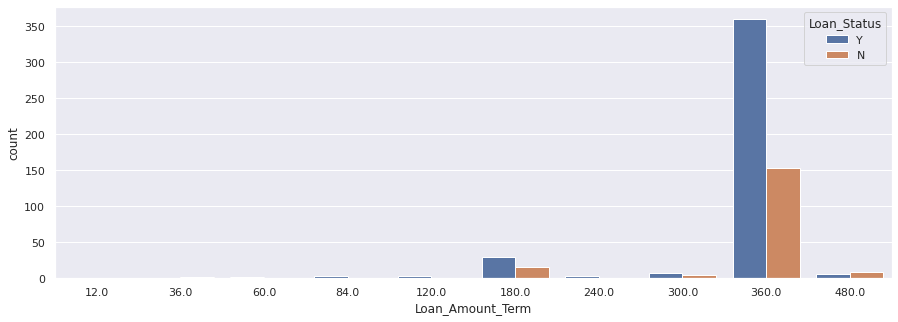

In [ ]:
# Loan Amount Term

print(" Loan term count:\n",loan_df.Loan_Amount_Term.value_counts())

plt.figure(figsize=(15,5))

sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan_df);

 Credit History count:
 1.0    475
0.0     89
Name: Credit_History, dtype: int64


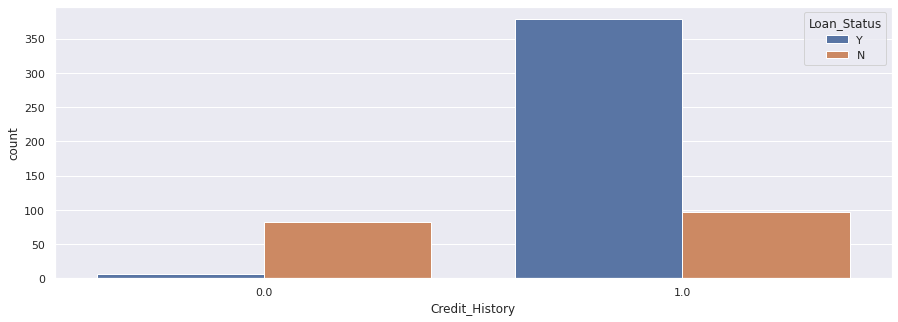

In [ ]:
# Credit_History

print("Credit History count:\n",loan_df.Credit_History.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_df);

 Property Area count:
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


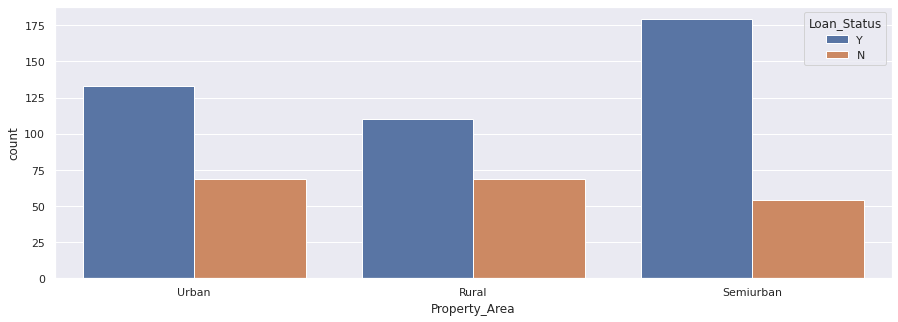

In [ ]:
#Property Area

print(" Property Area count:\n",loan_df.Property_Area.value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_df);

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.scatter(loan_df, x='ApplicantIncome', y='LoanAmount',color="Loan_Status")
fig.update_layout(title='Applicant Income Vs Loan Amount With Loan Status ',
                  xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

From the tables we can see that the dataset is imbalanced, it does not have the same number of samples for granted and denied loan, and there are missing values for 7 attributes, varying from 3 to 50 missing values. In order to continue, we need to decide what to do with the data that has missing values. 

## STEP 2: Preprocessing

Drop feature that is not relevant


*   Loan ID


Fill up the missing values:

*   mode for categorical features
*   mean or median for numerical features
* zero for dependents: dependents can be categorized as missing not at random (if a person "forgot" to fill up the number of dependents, most likely they don't have dependents)
* zero for credit history: credit history can be categorized as missing not at random (if a person "forgot" to fill up their credit history, most likely they don't have it)


1. Gender               13     ->    mode

2. Married               3     ->    mode

3. Dependents           15     ->      0

4. Self_Employed        32     ->    mode

5. LoanAmount           22     ->    mean

6. Loan_Amount_Term     14     ->    median

7. Credit_History       50     ->    0


In [ ]:
# Loan_ID: drop the feature that is not relevant 
mod_loan_df = loan_df.drop(['Loan_ID'], axis=1)

# Fill up missing values
# Dependents: Replace the missing value with '0' using 'fillna' method, someone is 
# unlikely to forget to mention dependents when they have 
mod_loan_df['Dependents'] = mod_loan_df['Dependents'].fillna('0')
#mod_loan_df['Dependents'] = mod_loan_df['Dependents'].fillna(mod_loan_df['Dependents'].mode()[0]) # use mode for all categorical data

# Gender, Married, Self_Employed, and Credit_History: replace missing values of categorical columns with mode
mod_loan_df['Gender'] = mod_loan_df['Gender'].fillna(mod_loan_df['Gender'].mode()[0])
mod_loan_df['Married'] = mod_loan_df['Married'].fillna(mod_loan_df['Married'].mode()[0])
mod_loan_df['Self_Employed'] = mod_loan_df['Self_Employed'].fillna(mod_loan_df['Self_Employed'].mode()[0])

# Credit History has a big impact on the loan status, so all missing values should be considered as non-existing
mod_loan_df['Credit_History'] = mod_loan_df['Credit_History'].fillna('0')
#mod_loan_df['Credit_History'] = mod_loan_df['Credit_History'].fillna(mod_loan_df['Credit_History'].mode()[0]) # use mode for all categorical data
mod_loan_df['Credit_History'] = mod_loan_df['Credit_History'].astype(int)

# LoanAmount: replace missing values of numerical columns with mean
mod_loan_df['LoanAmount'] = mod_loan_df['LoanAmount'].fillna(mod_loan_df['LoanAmount'].mean())

# Loan_Amount_Term: replace missing values of numerical columns with median
mod_loan_df['Loan_Amount_Term'] = mod_loan_df['Loan_Amount_Term'].fillna(mod_loan_df['Loan_Amount_Term'].median())
mod_loan_df['Loan_Amount_Term'] = mod_loan_df['Loan_Amount_Term'].astype(int)

# Check the missing values again
print(mod_loan_df.isnull().sum())
print("\nTotal missing values: ", mod_loan_df.isnull().sum().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Total missing values:  0


In [ ]:
# Encode the categorical data into numerical values

from sklearn.preprocessing import LabelEncoder

df_dummies = mod_loan_df

# Change all categorical features that are binary into 0 or 1
#df['column name'] = df['column name'].replace(['old value'],'new value')
df_dummies['Gender'] = df_dummies['Gender'].replace(['Male','Female'],[1,0])
df_dummies['Married'] = df_dummies['Married'].replace(['Yes', 'No'],[1,0])
df_dummies['Education'] = df_dummies['Education'].replace(['Graduate','Not Graduate'],[1,0])
df_dummies['Self_Employed'] = df_dummies['Self_Employed'].replace(['Yes','No'],[1,0])
df_dummies['Loan_Status'] = df_dummies['Loan_Status'].replace(['Y','N'], [1,0])

# Change all categorical features with more values to an integer
df_dummies = pd.get_dummies(df_dummies)

#df_dummies['Dependents'] = df_dummies['Dependents'].replace(['0','1','2'],[0,1,2])
#df_dummies['Dependents'] = df_dummies['Dependents'].replace('3+' , 3)
#df_dummies['Property_Area'] = df_dummies['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])

df_dummies.info()

#df_upsampled.head(10)
cols = ['Gender', 'Married','Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
#df_upsampled[cols] = df_upsampled[cols].apply(LabelEncoder().fit_transform)

#df_upsampled.sample(10)
#df_upsampled['Dependents'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    int64  
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

In [ ]:
df_dummies.sample(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
296,1,1,1,0,6875,0.0,200.000000,360,1,1,0,1,0,0,0,1,0
97,1,1,1,0,1977,997.0,50.000000,360,1,1,1,0,0,0,0,1,0
381,1,0,1,0,5941,4232.0,296.000000,360,1,1,1,0,0,0,0,1,0
432,1,0,1,0,12876,0.0,405.000000,360,1,1,1,0,0,0,0,1,0
525,1,1,1,1,17500,0.0,400.000000,360,1,1,0,0,1,0,1,0,0
548,0,0,1,0,5000,0.0,103.000000,360,0,0,1,0,0,0,0,1,0
101,1,0,1,0,4843,3806.0,151.000000,360,1,1,1,0,0,0,0,1,0
246,1,1,1,0,9703,0.0,112.000000,360,1,1,0,0,1,0,0,0,1
524,1,0,1,0,4680,2087.0,146.412162,360,1,0,1,0,0,0,0,1,0
488,1,1,1,1,4583,2083.0,160.000000,360,1,1,0,0,1,0,0,1,0


In [ ]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    int64  
 8   Credit_History           614 non-null    int64  
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

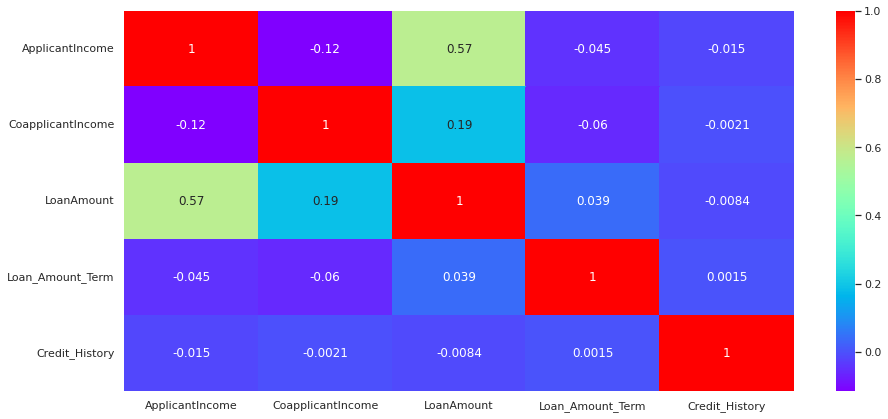

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)

# heatmap 
plt.figure(figsize = (15,7))
sns.heatmap(loan_df.corr(), annot = True, cmap="rainbow")
plt.show()


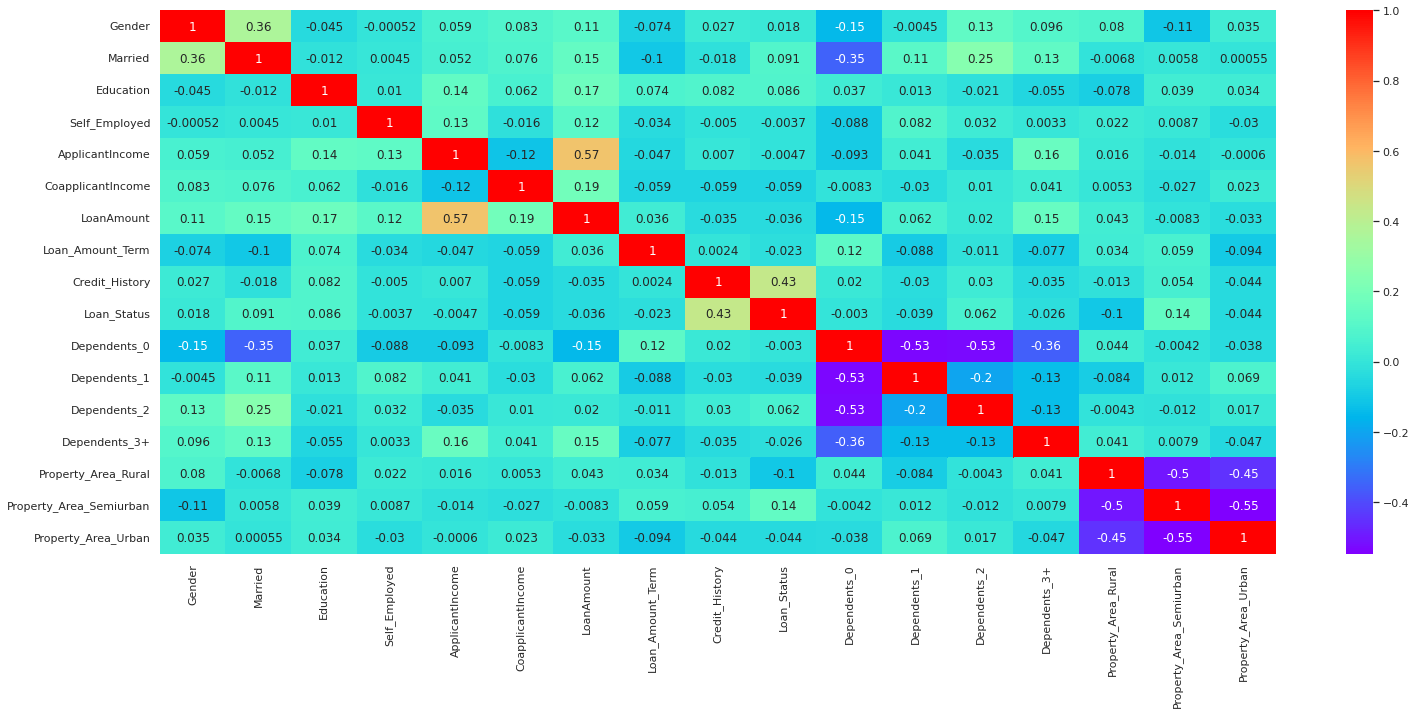

In [ ]:
sns.set(style="dark", color_codes=True)

# heatmap 
plt.figure(figsize = (25,10))
sns.heatmap(df_dummies.corr(), annot = True, cmap="rainbow")
plt.show()

Analysing the graphics, we can see that the co-applicant income, the education, and credit history have greater impact on being refused or granted the loan. Thus, these features are better predictors of the loan classifier.

## STEP 3 - Split data into training, validation, and testing

In [ ]:
# X_train and y_train on full dataset
from sklearn.model_selection import train_test_split

# X = df_upsampled.iloc[:,:11]
# Y = df_upsampled['Loan_Status']
# X = pd.get_dummies(X,drop_first=True)

df_dummies.shape
print("Total:\t",df_dummies.shape)

Y = df_dummies['Loan_Status']
X = df_dummies.drop(['Loan_Status'], axis=1)

#X.head()
#Y.head()

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program 

print("X train:",X_train.shape)
print("Y train:", y_train.shape)

print("X test:\t",X_test.shape)
print("Y test:\t", y_test.shape)

Total:	 (614, 17)
X train: (429, 16)
Y train: (429,)
X test:	 (185, 16)
Y test:	 (185,)


In [ ]:
# Imbalanced dataset: Upsample the minority class (NO class)

from sklearn.utils import resample
'''

#print("Loan Status count:\n",loan_df.Loan_Status.value_counts())
print("Loan Status count:\n",df_dummies.Loan_Status.value_counts())

# Separate majority and minority classes
#df_majority = loan_df[loan_df.Loan_Status=='Y']
#df_minority = loan_df[loan_df.Loan_Status=='N']

df_majority = df_dummies[df_dummies.Loan_Status=='1']
df_minority = df_dummies[df_dummies.Loan_Status=='0']

print("Majority Y", df_majority.shape)
print("Minority N", df_minority.shape)

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=422,    # to match majority class
                                 random_state=10)  # for reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print("Loan_Status Count:")
print(df_upsampled.Loan_Status.value_counts())
print('\nFeature Count:')
print(df_upsampled.info())

#print(df_upsampled.sample(10))

'''

In [ ]:
# use SMOTE to balance the dataset by oversampling N
from imblearn.over_sampling import SMOTE
from collections import Counter

counter_y = Counter(y_train)
print("Before:", counter_y)
print("Xtrain: ", X_train.shape)

# transform the dataset
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# summarize the new class distribution
counter_y = Counter(y_train_smt)

print("After:", counter_y)
print("Xtrain: ", X_train_smt.shape)



Before: Counter({1: 300, 0: 129})
Xtrain:  (429, 16)
After: Counter({1: 300, 0: 300})
Xtrain:  (600, 16)


In [ ]:
# use ADASYN to balance the dataset by oversampling N

from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print("Before:", counter)
print("Before:", counter_y)
print("Xtrain: ", X_train.shape)

# transform the dataset
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_ada)
print("After:",counter)
print("Xtrain: ", X_train_ada.shape)


Before: Counter({1: 300, 0: 129})
Before: Counter({1: 300, 0: 300})
Xtrain:  (429, 11)
After: Counter({1: 300, 0: 282})
Xtrain:  (582, 11)


## STEP 4 - Fit a **decision tree** on the training dataset

Default Decision Tree numbers:
Depth: 17 Number of leaves: 97
acc: 1.0

Decision Tree on all Loan Features Trained using Default Model



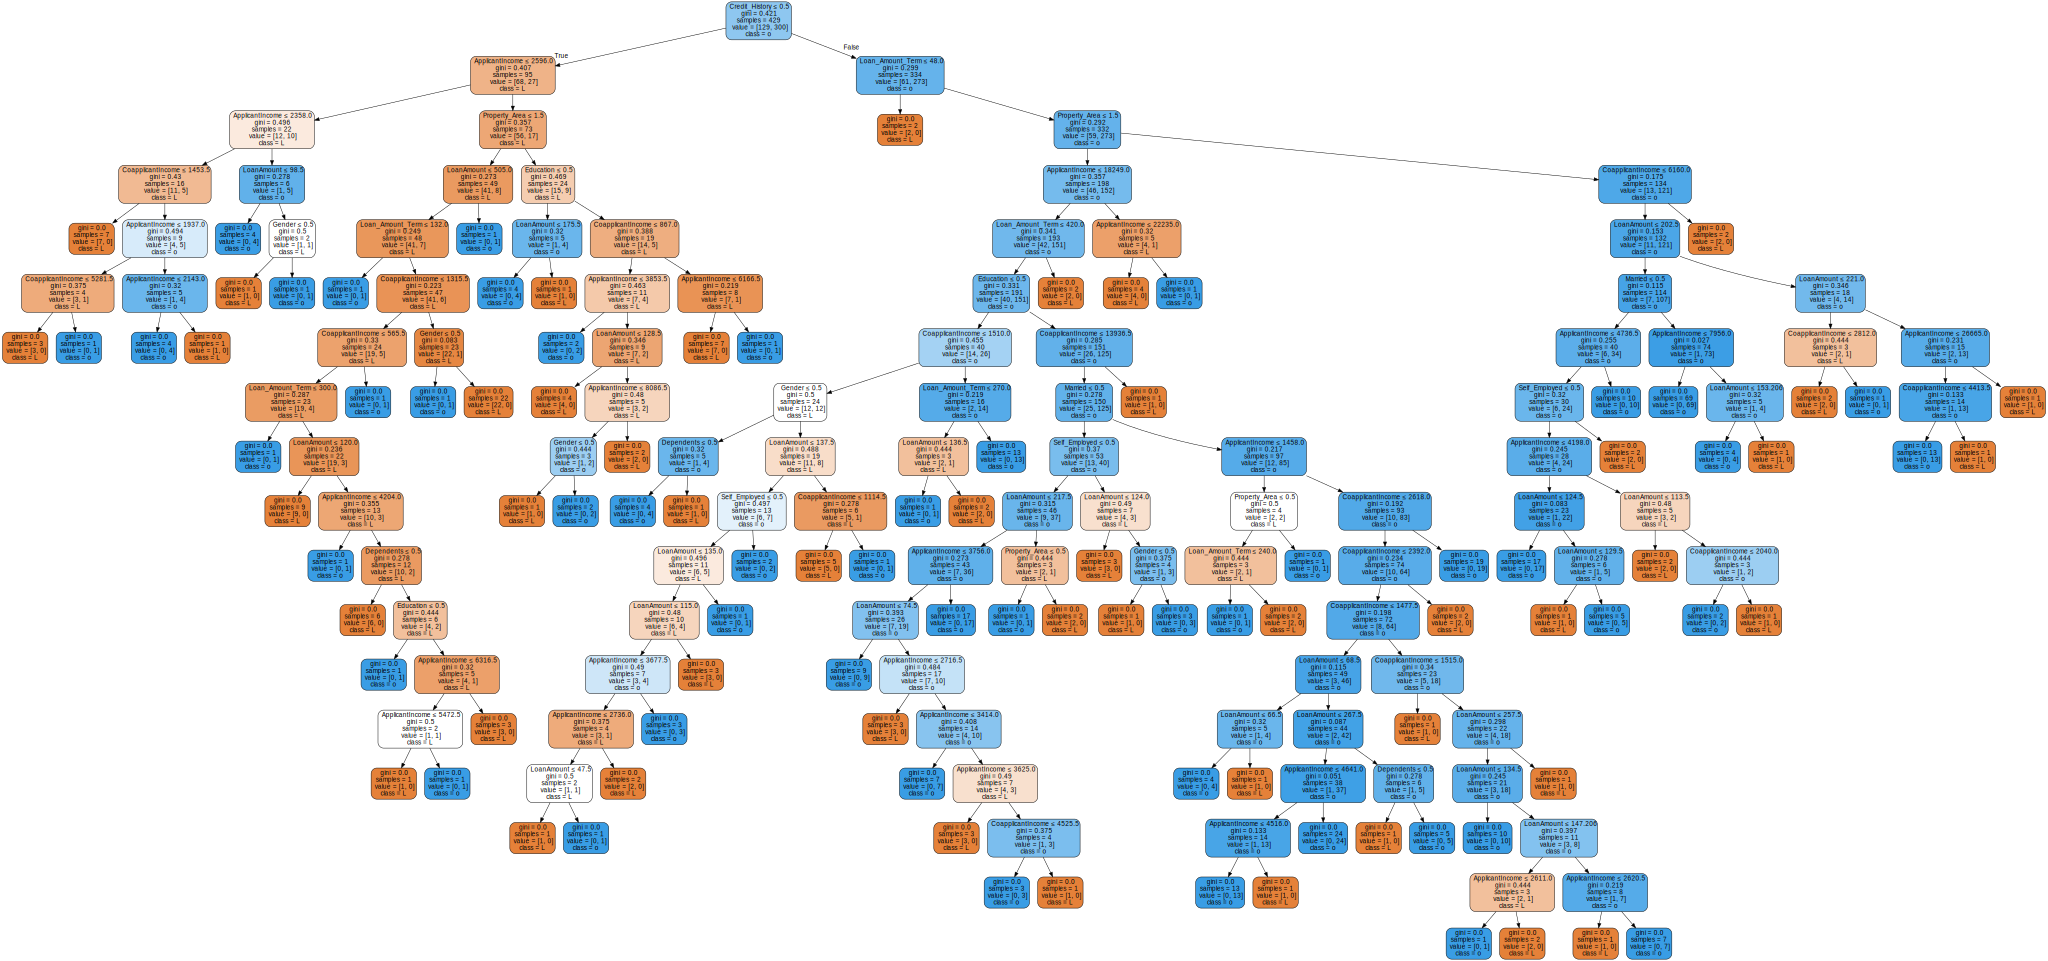

In [ ]:
# Imbalanced data

from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# create the Decision Tree model (default hyperparamters) 
clf = tree.DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
acc=accuracy_score(y_train,y_pred)

print('Default Decision Tree numbers:')
print("Depth:", clf.get_depth(), 'Number of leaves:', clf.get_n_leaves())
print('acc:', acc)

print("\nDecision Tree on all Loan Features Trained using Default Model\n")
'''
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                     feature_names= X.columns, 
                     class_names= 'Loan_Status', 
                     filled=True)
fig.savefig("loan_decision_tree.png")
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Loan") 

dot_data = tree.export_graphviz(clf, out_file= None, 
                                feature_names= X.columns,  
                                class_names= 'Loan_Status',  
                                filled= True, rounded= True,  
                                special_characters= True)  
graph = graphviz.Source(dot_data, format='png')  
graph 
#graph.render("decision_tree_graphivz")



Default Decision Tree numbers:
Depth: 16 Number of leaves: 111

Decision Tree on all Loan Features Trained using Default Model



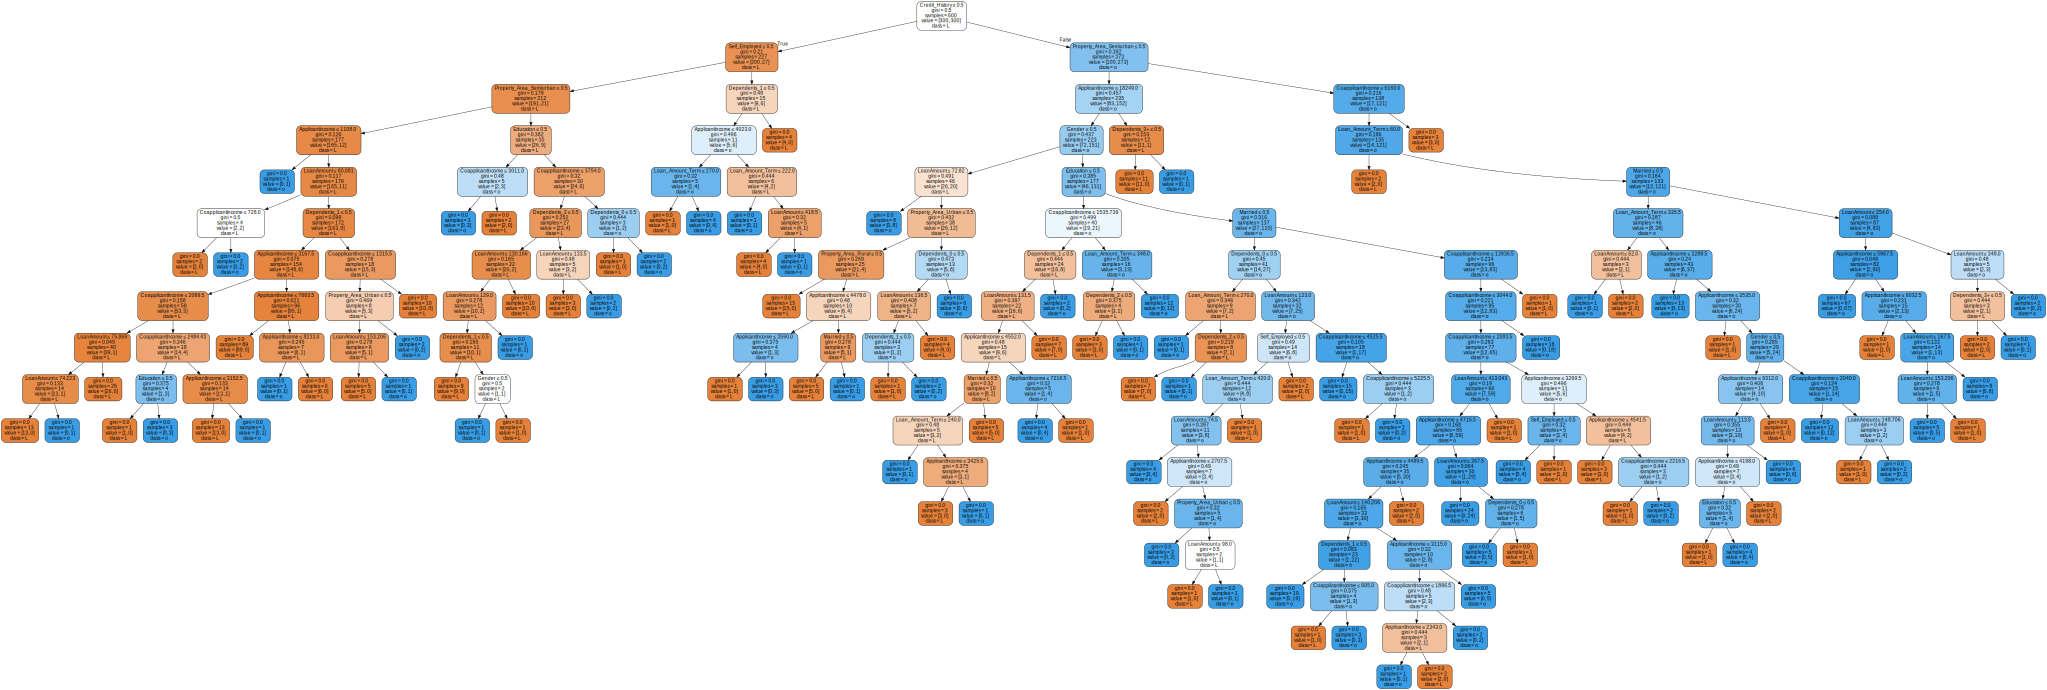

In [ ]:
# Oversampled using SMOTE

from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# create the Decision Tree model (default hyperparamters) uisng the SMOTE oversampled 
clf_smt = tree.DecisionTreeClassifier(random_state=10)
clf_smt.fit(X_train_smt, y_train_smt)
ysmt_pred = clf_smt.predict(X_train_smt)
acc_smt= accuracy_score(y_train_smt,ysmt_pred)

print('Default Decision Tree numbers:')
print("Depth:", clf_smt.get_depth(), 'Number of leaves:', clf_smt.get_n_leaves())

print("\nDecision Tree on all Loan Features Trained using Default Model\n")
'''
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                     feature_names= X.columns, 
                     class_names= 'Loan_Status', 
                     filled=True)
fig.savefig("loan_decision_tree.png")
'''
import graphviz 
dot_data = tree.export_graphviz(clf_smt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Loan") 

dot_data = tree.export_graphviz(clf_smt, out_file= None, 
                                feature_names= X.columns,  
                                class_names= 'Loan_Status',  
                                filled= True, rounded= True,  
                                special_characters= True)  
graph = graphviz.Source(dot_data, format='png')  
graph 
#graph.render("decision_tree_graphivz")

Default Decision Tree numbers:
Depth: 15 Number of leaves: 108

Decision Tree on all Loan Features Trained using Default Model



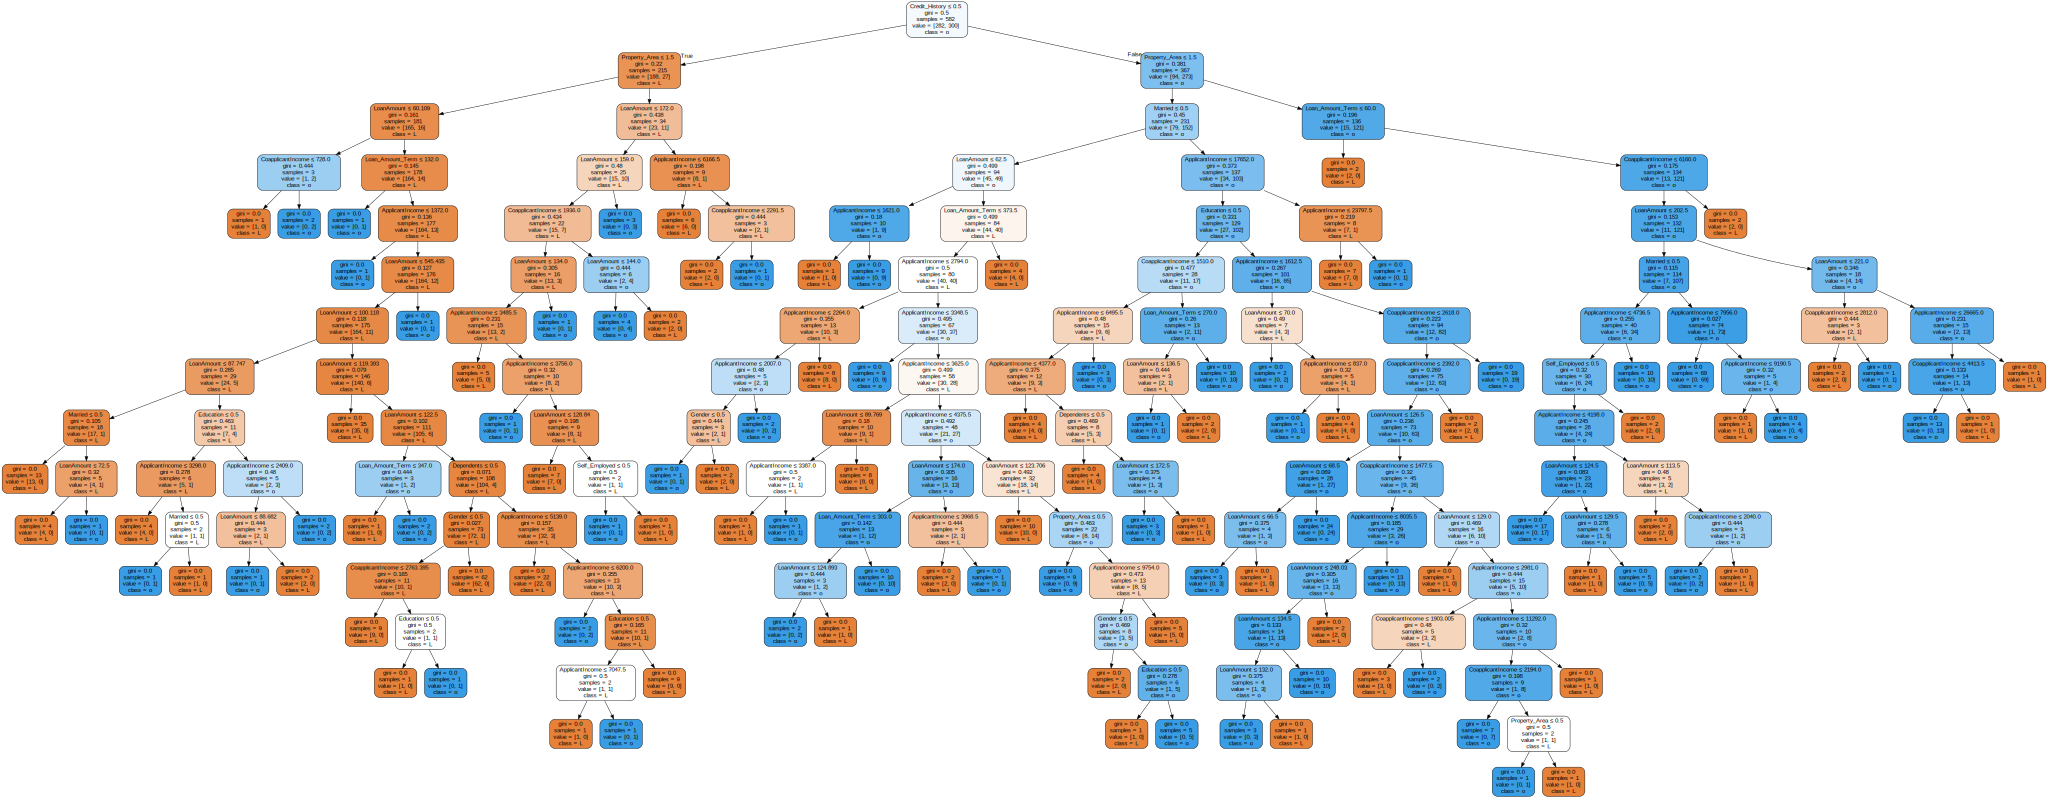

In [ ]:
# Oversampled using ADASYN

from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# create the Decision Tree model (default hyperparamters) uisng the SMOTE oversampled 
clf_ada = tree.DecisionTreeClassifier(random_state=10)
clf_ada.fit(X_train_ada, y_train_ada)
yada_pred = clf_ada.predict(X_train_ada)
acc_ada=accuracy_score(y_train_ada,yada_pred)

print('Default Decision Tree numbers:')
print("Depth:", clf_ada.get_depth(), 'Number of leaves:', clf_ada.get_n_leaves())

print("\nDecision Tree on all Loan Features Trained using Default Model\n")
'''
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                     feature_names= X.columns, 
                     class_names= 'Loan_Status', 
                     filled=True)
fig.savefig("loan_decision_tree.png")
'''
import graphviz 
dot_data = tree.export_graphviz(clf_ada, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Loan") 

dot_data = tree.export_graphviz(clf_ada, out_file= None, 
                                feature_names= X.columns,  
                                class_names= 'Loan_Status',  
                                filled= True, rounded= True,  
                                special_characters= True)  
graph = graphviz.Source(dot_data, format='png')  
graph 
#graph.render("decision_tree_graphivz")

### STEP 4A - Tune at least 2 hyperparameters in the decision tree model based on the performance on the validation set or using cross-validation. One hyperparameter has to be max_depth. Generate a plot of hyperparameter values w.r.t. performance metric


In [ ]:
# Original imbalanced dataset

import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np

# Compare performance of Gini and Entropy hyperparameters
clfE = tree.DecisionTreeClassifier(random_state=10,criterion='entropy')
clfE.fit(X_train, y_train)
y_predE = clfE.predict(X_train)
accE=accuracy_score(y_train,y_predE)

print("Accuracy without cross-validation using Gini: ",acc)
print("Accuracy without cross-validation using Entropy: ",accE)

table = PrettyTable()
#table.field_names = ['cv','Gini', 'Gini std', 'Entropy', 'Entropy std']
table.field_names = ['cv','Gini', 'Entropy']

# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  scoresE = cross_val_score(clfE, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  # print('Accuracy with %.0f fold cross-validation using Gini: %.3f (%.3f)' % (n, mean(scores), std(scores)))
  # print('Accuracy with %.0f fold cross-validation using Entropy: %.3f (%.3f)' % (n, mean(scoresE), std(scoresE)))
  table.add_row([n, mean(scores), mean(scoresE)])
  #table.add_row([n, mean(scores), std(scores), mean(scoresE), std(scoresE)])

print(table)


Accuracy without cross-validation using Gini:  1.0
Accuracy without cross-validation using Entropy:  1.0
+----+--------------------+--------------------+
| cv |        Gini        |      Entropy       |
+----+--------------------+--------------------+
| 2  | 0.6643121060638991 | 0.6783307976526842 |
| 3  |  0.68997668997669  | 0.675990675990676  |
| 4  | 0.6783056420906889 | 0.6597654897888543 |
| 5  | 0.6642407660738715 | 0.6714090287277703 |
| 6  | 0.6480503390714658 | 0.6691444966092854 |
| 7  | 0.6758328926493917 | 0.6362846566442547 |
| 8  | 0.6411600279524807 | 0.6781970649895177 |
| 9  | 0.6668636721828212 | 0.6689322301024428 |
| 10 | 0.6432447397563676 | 0.6384828349944629 |
+----+--------------------+--------------------+


In [ ]:
# Oversampled dataset with SMOTE

# Compare performance of Gini and Entropy hyperparameters
clf_smtE = tree.DecisionTreeClassifier(random_state=10,criterion='entropy')
clf_smtE.fit(X_train_smt, y_train_smt)
ysmt_predE = clf_smtE.predict(X_train_smt)
acc_smtE=accuracy_score(y_train_smt,ysmt_predE)

print("Accuracy without cross-validation using Gini: ",acc_smt)
print("Accuracy without cross-validation using Entropy: ",acc_smtE)

table = PrettyTable()
table.field_names = ['cv','Gini', 'Gini std', 'Entropy', 'Entropy std']

# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scores_s = cross_val_score(clf_smt, X_train_smt, y_train_smt, scoring='accuracy', cv=kf, n_jobs=-1)
  scores_sE = cross_val_score(clf_smtE, X_train_smt, y_train_smt, scoring='accuracy', cv=kf, n_jobs=-1)
  table.add_row([n, mean(scores_s), std(scores_s), mean(scores_sE), std(scores_sE)])

print('\nCV for oversampled dataset using SMOTE')
print(table)


Accuracy without cross-validation using Gini:  1.0
Accuracy without cross-validation using Entropy:  1.0

CV for oversampled dataset using SMOTE
+----+--------------------+----------------------+--------------------+----------------------+
| cv |        Gini        |       Gini std       |      Entropy       |     Entropy std      |
+----+--------------------+----------------------+--------------------+----------------------+
| 2  | 0.7649999999999999 | 0.031666666666666676 | 0.7383333333333333 | 0.018333333333333368 |
| 3  |        0.75        | 0.008164965809277268 | 0.7516666666666666 | 0.008498365855987981 |
| 4  |       0.755        | 0.01787300882460601  | 0.7416666666666667 | 0.013642254619787412 |
| 5  | 0.7716666666666667 | 0.03100179206289712  | 0.7699999999999999 | 0.02147349787787521  |
| 6  | 0.7716666666666668 | 0.030776975521032313 | 0.7400000000000001 |  0.0608276253029822  |
| 7  | 0.7668946648426812 | 0.05090032890610718  | 0.7550908735587258 | 0.028481661144830764 |


In [ ]:
# Oversampled dataset with ADASYN

# Compare performance of Gini and Entropy hyperparameters
clf_adaE = tree.DecisionTreeClassifier(random_state=10,criterion='entropy')
clf_adaE.fit(X_train_ada, y_train_ada)
yada_predE = clf_adaE.predict(X_train_ada)
acc_adaE=accuracy_score(y_train_ada,yada_predE)

print("Accuracy without cross-validation using Gini: ",acc_ada)
print("Accuracy without cross-validation using Entropy: ",acc_adaE)

table = PrettyTable()
table.field_names = ['cv','Gini', 'Gini std', 'Entropy', 'Entropy std']

# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scores_a = cross_val_score(clf_ada, X_train_ada, y_train_ada, scoring='accuracy', cv=kf, n_jobs=-1)
  scores_aE = cross_val_score(clf_adaE, X_train_ada, y_train_ada, scoring='accuracy', cv=kf, n_jobs=-1)
  table.add_row([n, mean(scores_a), std(scores_a), mean(scores_aE), std(scores_aE)])

print(table)


Accuracy without cross-validation using Gini:  1.0
Accuracy without cross-validation using Entropy:  1.0
+----+--------------------+----------------------+--------------------+----------------------+
| cv |        Gini        |       Gini std       |      Entropy       |     Entropy std      |
+----+--------------------+----------------------+--------------------+----------------------+
| 2  | 0.7628865979381443 | 0.013745704467353959 | 0.7560137457044673 | 0.027491408934707917 |
| 3  | 0.7783505154639174 | 0.021869281892367476 | 0.7749140893470791 | 0.009719680841052167 |
| 4  | 0.759506376948512  | 0.037512409097355925 | 0.7594355219650449 | 0.03665447868295525  |
| 5  | 0.7594459180666077 | 0.021785817948578458 | 0.7543471853816681 | 0.016903480414666213 |
| 6  | 0.7697594501718212 | 0.042783160130545485 | 0.7628865979381444 | 0.03811180930037599  |
| 7  | 0.7491803950495862 | 0.053056610688123236 | 0.7663511187607572 | 0.03497302199004493  |
| 8  | 0.7681459284627092 | 0.0550159539

Comparing the results of the imbalaced, oversampling using SMOTE, and oversampling using ADASYN, the best results are achieved with the SMOTE technique for the DecisionTree model, using gini and k-fold = 7

In [ ]:
# Variables to hold hyperparameter values in test
feature_important =[]
acc_metric0=[] # to hold accuracy of feature_importance hyperparemeter
max_depth=[]
acc_metric1=[]  # to hold accuracy of max_depth hyperparemeter
max_leaf_nodes=[]
acc_metric2=[] # to hold accuracy of max_leaf_nodes hyperparemeter
min_samples_leaf=[]
acc_metric3=[] # to hold accuracy of min_samples_leaf hyperparemeter
min_impurity_decrease=[]
acc_metric4=[] # to hold accuracy of min_impurity hyperparemeter
min_samples_split =[]
acc_metric5=[] # to hold accuracy of min_samples_split hyperparemeter


kf = KFold(random_state=10, shuffle=True, n_splits= 5) # 7-fold using gini 


Model 0 Gini:
+-------------------------+----------------------+
|         Feature         |      Importance      |
+-------------------------+----------------------+
|          Gender         | 0.02834181671004115  |
|         Married         | 0.019637170323681157 |
|        Education        | 0.03084719939359307  |
|      Self_Employed      | 0.018870931311044312 |
|     ApplicantIncome     | 0.13620319872048656  |
|    CoapplicantIncome    | 0.10295987729439755  |
|        LoanAmount       | 0.11568338045805121  |
|     Loan_Amount_Term    | 0.04697553717757094  |
|      Credit_History     |  0.3534740347934948  |
|       Dependents_0      | 0.03562372191945362  |
|       Dependents_1      | 0.022583597056802282 |
|       Dependents_2      | 0.013428170594837266 |
|      Dependents_3+      | 0.010555555555555556 |
|   Property_Area_Rural   | 0.006400000000000003 |
| Property_Area_Semiurban | 0.03764734265410344  |
|   Property_Area_Urban   | 0.02076846603688708  |
+---------------

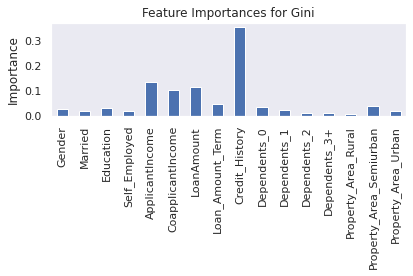

In [ ]:
#Oversampled dataset with SMOTE

from matplotlib import pyplot

# Model 0, feature_importances_ in hyperparameter
print("\nModel 0 Gini:")
feat_names = X.columns

# define the model
model = tree.DecisionTreeClassifier(criterion='gini', random_state=10) 
# fit the model
model.fit(X_train_smt, y_train_smt)
# get importances
importances = model.feature_importances_

# summarize feature importances in a table
table6 = PrettyTable()
table6.field_names = ['Feature','Importance']
for i,v in enumerate(importances):
  table6.add_row([feat_names[i], v])
print(table6)

# plot feature importances
tree_importances = pd.Series(importances, index=feat_names)
fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature Importances for Gini")
ax.set_ylabel("Importance")
fig.tight_layout()

#pyplot.bar([x for x in range(len(importances))], importances)
#pyplot.show()



Model 0 Entropy:
+-------------------------+----------------------+
|         Feature         |      Importance      |
+-------------------------+----------------------+
|          Gender         | 0.004943003672739341 |
|         Married         | 0.04230123090441091  |
|        Education        | 0.04205901329872489  |
|      Self_Employed      | 0.01332387242119053  |
|     ApplicantIncome     |  0.1916938372156885  |
|    CoapplicantIncome    | 0.10118116840894818  |
|        LoanAmount       | 0.11932460943596981  |
|     Loan_Amount_Term    | 0.05209412001984905  |
|      Credit_History     | 0.27947357231951564  |
|       Dependents_0      | 0.036146546573997816 |
|       Dependents_1      | 0.026492651101264607 |
|       Dependents_2      | 0.014750465778291026 |
|      Dependents_3+      | 0.010351524502466895 |
|   Property_Area_Rural   | 0.010607546627667134 |
| Property_Area_Semiurban | 0.04237401127865056  |
|   Property_Area_Urban   | 0.012882826440625066 |
+------------

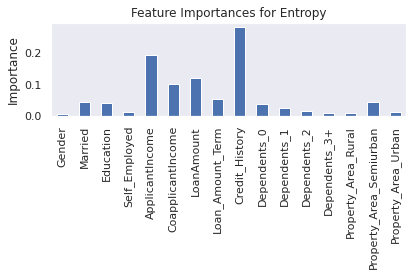

In [ ]:
#Oversampled dataset with SMOTE

from matplotlib import pyplot

# Model 0, feature_importances_ in hyperparameter
print("\nModel 0 Entropy:")
feat_names = X.columns

# define the model
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=10) 
# fit the model
model.fit(X_train_smt, y_train_smt)
# get importances
importances = model.feature_importances_

# summarize feature importances in a table
table6 = PrettyTable()
table6.field_names = ['Feature','Importance']
for i,v in enumerate(importances):
  table6.add_row([feat_names[i], v])
print(table6)

# plot feature importances
tree_importances = pd.Series(importances, index=feat_names)
fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature Importances for Entropy")
ax.set_ylabel("Importance")
fig.tight_layout()

+-------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------------+
|                                                                     Features                                                                    |      Accuracy      |         std          |
+-------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------------+
|                                                      ['Credit_History', 'ApplicantIncome']                                                      | 0.7433333333333334 | 0.031358146203711315 |
|                                                        ['LoanAmount', 'ApplicantIncome']                                                        | 0.6066666666666667 | 0.020682789409984772 |
|                                       

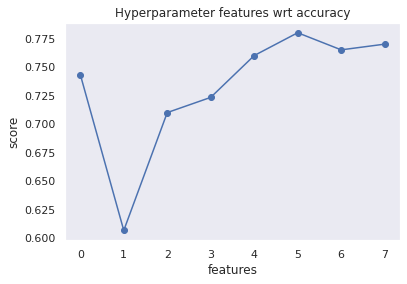

In [ ]:
# Oversampled dataset with SMOTE
features_names = [['Credit_History','ApplicantIncome'],
                  ['LoanAmount','ApplicantIncome'],
                  ['LoanAmount','Credit_History','ApplicantIncome'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Semiurban'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Semiurban','Married'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Semiurban','Married', 'Education']]


table6b = PrettyTable()
table6b.field_names = ['Features','Accuracy', 'std']
for feature in features_names:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=10)
    X_train_selection = X_train_smt[feature]
    #print(X_train_selection.columns)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: features_name_in = ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    feature_important.append(feature)
    acc_metric0.append(mean(scores))
    table6b.add_row([feature, mean(scores), std(scores)])

print(table6b)

plt.title("Hyperparameter features wrt accuracy") 
plt.xlabel("features") 
plt.ylabel("score") 
plt.plot(acc_metric0,marker='o', color='b') #[i in len(features_names)]
plt.show()


In [ ]:
# SMOTE

from sklearn.metrics import classification_report

best_features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Semiurban']
# best_features = ['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
X_train_selection = X_train_smt[best_features]

print("All features", X_train_smt.shape)
print("Selected features", X_train_selection.shape)

# create the Decision Tree model with selected features
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10)

# Using all features
clf.fit(X_train_smt, y_train_smt)
y_pred = clf.predict(X_train_smt)
scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=kf)

print("\nDecision Tree Trained with All Features on SMOTE Overesampled")
print("Depth:", clf.get_depth(), 'Number of leaves:', clf.get_n_leaves())
print('\tScores: %.3f (%.3f)' % (mean(scores), std(scores)))

# Using selected features
clf.fit(X_train_selection, y_train_smt)
y_pred = clf.predict(X_train_selection)
scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)

print("\nDecision Tree Trained with Selected Features on SMOTE Overesampled")
print("Depth:", clf.get_depth(), 'Number of leaves:', clf.get_n_leaves())
print('\tScores: %.3f (%.3f)' % (mean(scores), std(scores)))


All features (600, 16)
Selected features (600, 6)

Decision Tree Trained with All Features on SMOTE Overesampled
Depth: 16 Number of leaves: 111
	Scores: 0.772 (0.031)

Decision Tree Trained with Selected Features on SMOTE Overesampled
Depth: 14 Number of leaves: 117
	Scores: 0.780 (0.020)


In [ ]:
# Use gridSearchCV to find best hyperparameters using all features

from sklearn.model_selection import GridSearchCV

print("Parameters:",clf.get_params().keys())

tree_params = [{'max_depth': list(range(2, 11)),'max_leaf_nodes': list(range(5, 31)) }] # 'min_samples_leaf': list(range(2,11)
grid = GridSearchCV(estimator= clf, param_grid= tree_params, cv= kf, scoring= 'accuracy')
grid.fit(X_train_smt, y_train_smt)
print(grid.best_params_)


Parameters: dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
{'max_depth': 6, 'max_leaf_nodes': 9}


In [ ]:
# Use gridSearchCV to find best hyperparameters using selected features

from sklearn.model_selection import GridSearchCV

print("Parameters:",clf.get_params().keys())

tree_params = [{'max_depth': list(range(2, 14)),'max_leaf_nodes': list(range(5, 51)) }] # 'min_samples_leaf': list(range(2,11)
grid = GridSearchCV(estimator= clf, param_grid= tree_params, cv= kf, scoring= 'accuracy')
grid.fit(X_train_selection, y_train_smt)
print(grid.best_params_)


Parameters: dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
{'max_depth': 7, 'max_leaf_nodes': 10}


In [ ]:
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

count={}
#clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=10)

for i in range(50):
  tree_params = [{'max_depth': list(range(2, 11)), #}]
                  'max_leaf_nodes': list(range(2, 31)) }]
                  #'min_samples_leaf': list(range(2,9)) }]
  grid = GridSearchCV(estimator=clf, param_grid=tree_params, cv=kf, n_jobs=-1, scoring='accuracy')
  grid.fit(X_train_smt, y_train_smt)
  #if clf.best_params_['criterion'] in count:
  #  count[clf.best_params_['criterion']]+=1
  #else:
  #  count[clf.best_params_['criterion']]=1

  if grid.best_params_['max_depth'] in count:
    count[grid.best_params_['max_depth']]+=1
  else:
    count[grid.best_params_['max_depth']]=1

  if grid.best_params_['max_leaf_nodes'] in count:
    count[grid.best_params_['max_leaf_nodes']]+=1
  else:
    count[grid.best_params_['max_leaf_nodes']]=1

#  if grid.best_params_['min_samples_leaf'] in count:
#    count[grid.best_params_['min_samples_leaf']]+=1
#  else:
#    count[grid.best_params_['min_samples_leaf']]=1
   
print(count)


{2: 100}



Model 1:
+-----------+--------------------+----------------------+
| max_depth |      Accuracy      |         std          |
+-----------+--------------------+----------------------+
|     1     | 0.7883333333333333 | 0.02449489742783177  |
|     2     |        0.79        | 0.024944382578492928 |
|     3     | 0.7933333333333333 | 0.019293061504650353 |
|     4     | 0.7966666666666666 | 0.029627314724385304 |
|     5     | 0.7916666666666666 | 0.01900292375165228  |
|     6     | 0.7949999999999999 | 0.020138409955990935 |
|     7     | 0.7916666666666667 | 0.025276251480171832 |
|     8     | 0.8016666666666667 | 0.016158932858054424 |
|     9     | 0.7950000000000002 | 0.021473497877875183 |
|     10    | 0.8016666666666667 | 0.009718253158075512 |
|     11    | 0.7949999999999999 | 0.016329931618554505 |
|     12    | 0.7916666666666667 | 0.02738612787525829  |
|     13    | 0.7866666666666667 | 0.01354006400772659  |
|     14    | 0.7816666666666666 | 0.022607766610417544 |
|   

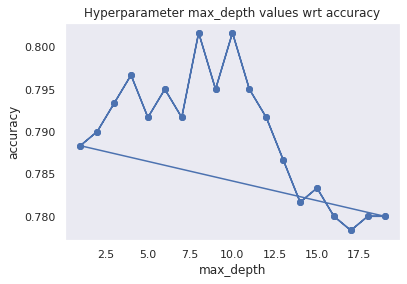


Model 2:
+----------------+--------------------+----------------------+
| max_leaf_nodes |      Accuracy      |         std          |
+----------------+--------------------+----------------------+
|       2        | 0.7883333333333333 | 0.02449489742783177  |
|       3        | 0.7916666666666666 | 0.02357022603955158  |
|       4        | 0.8016666666666665 | 0.027588242262078067 |
|       5        | 0.8016666666666665 | 0.027588242262078067 |
|       6        | 0.7983333333333332 | 0.03045944480416178  |
|       7        |        0.8         | 0.026352313834736484 |
|       8        | 0.7983333333333332 | 0.028087165910587845 |
|       9        | 0.8083333333333333 | 0.019720265943665383 |
|       10       | 0.8100000000000002 | 0.019293061504650374 |
|       11       | 0.8100000000000002 | 0.01999999999999997  |
|       12       |       0.805        | 0.021473497877875208 |
|       13       | 0.8083333333333332 | 0.016666666666666653 |
|       14       | 0.8149999999999998 | 0.023

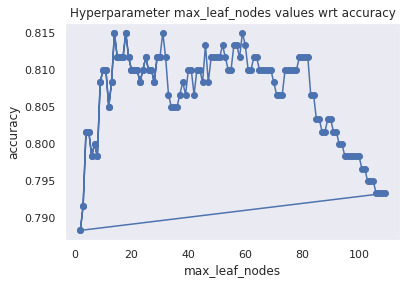


Model 3:
+------------------+--------------------+----------------------+
| min_samples_leaf |      Accuracy      |         std          |
+------------------+--------------------+----------------------+
|        2         | 0.7833333333333333 | 0.01054092553389456  |
|        3         | 0.7783333333333333 | 0.025055493963954827 |
|        4         |       0.775        | 0.03613247231446468  |
|        5         | 0.7916666666666666 | 0.029814239699997174 |
|        6         | 0.7933333333333332 | 0.030459444804161757 |
|        7         | 0.7916666666666666 | 0.014907119849998594 |
|        8         | 0.7833333333333333 | 0.025276251480171832 |
|        9         | 0.7766666666666666 | 0.016996731711975955 |
|        10        |        0.77        | 0.01943650631615101  |
+------------------+--------------------+----------------------+


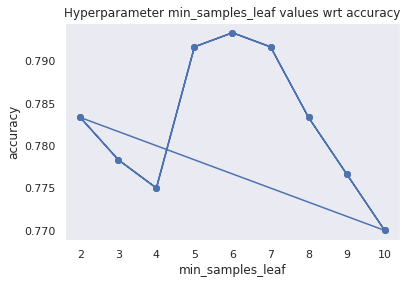


Model 4:
+---------------------+---------------------+----------------------+
|     min_impurity    |       Accuracy      |         std          |
+---------------------+---------------------+----------------------+
|         0.0         |         0.78        | 0.020138409955990946 |
|         0.05        |  0.7883333333333333 | 0.02449489742783177  |
|         0.1         |  0.7883333333333333 | 0.02449489742783177  |
| 0.15000000000000002 |  0.7883333333333333 | 0.02449489742783177  |
|         0.2         | 0.49000000000000005 | 0.009718253158075505 |
|         0.25        | 0.49000000000000005 | 0.009718253158075505 |
| 0.30000000000000004 | 0.49000000000000005 | 0.009718253158075505 |
| 0.35000000000000003 | 0.49000000000000005 | 0.009718253158075505 |
|         0.4         | 0.49000000000000005 | 0.009718253158075505 |
|         0.45        | 0.49000000000000005 | 0.009718253158075505 |
+---------------------+---------------------+----------------------+


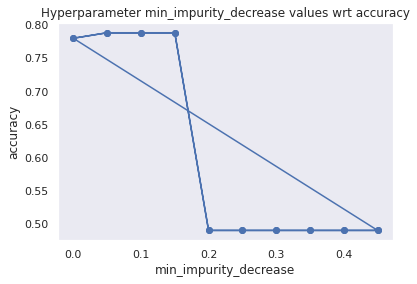


Model 5:
+-------------------+--------------------+----------------------+
| min_samples_split |      Accuracy      |         std          |
+-------------------+--------------------+----------------------+
|         2         |        0.78        | 0.020138409955990946 |
|         4         | 0.7983333333333332 | 0.011055415967851336 |
|         6         | 0.7933333333333333 | 0.012247448713915898 |
|         8         | 0.7933333333333332 | 0.01779513042005217  |
|         10        | 0.7933333333333332 | 0.026034165586355504 |
|         12        | 0.7916666666666667 | 0.01900292375165228  |
|         14        | 0.7899999999999999 | 0.01699673171197594  |
|         16        | 0.7966666666666666 | 0.020138409955990928 |
|         18        |        0.8         | 0.018257418583505523 |
|         20        | 0.8016666666666667 | 0.009718253158075509 |
|         22        | 0.7966666666666666 | 0.014529663145135577 |
|         24        |        0.79        | 0.011055415967851331 |


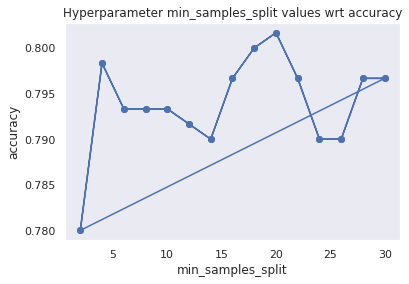

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Model 1, tune max_depth hyperparameter
print("\nModel 1:")
table1 = PrettyTable()
table1.field_names = ['max_depth','Accuracy', 'std']
for n in range (1, 20):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, max_depth=n)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: max_depth= ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_depth.append(n)
    acc_metric1.append(mean(scores))
    table1.add_row([n, mean(scores), std(scores)])

print(table1)

plt.title("Hyperparameter max_depth values wrt accuracy") 
plt.xlabel("max_depth") 
plt.ylabel("accuracy") 
plt.plot(max_depth,acc_metric1,marker='o', color='b')
plt.show()

#Model 2, tune max_leaf_nodes hyperparameter
print("\nModel 2:")
table2 = PrettyTable()
table2.field_names = ['max_leaf_nodes','Accuracy', 'std']
for n in range (2, 31):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, max_leaf_nodes=n)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: max_leaf_nodes=", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_leaf_nodes.append(n)
    acc_metric2.append(mean(scores))
    table2.add_row([n, mean(scores), std(scores)])

print(table2)

plt.title("Hyperparameter max_leaf_nodes values wrt accuracy") 
plt.xlabel("max_leaf_nodes") 
plt.ylabel("accuracy") 
plt.plot(max_leaf_nodes,acc_metric2,marker='o', color='b')
plt.show()

# Model 3, tune min_samples_leaf hyperparameter
print("\nModel 3:")
table3 = PrettyTable()
table3.field_names = ['min_samples_leaf','Accuracy', 'std']
for n in range (2, 11):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, min_samples_leaf = n)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: min_samples_leaf = ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    min_samples_leaf.append(n)
    acc_metric3.append(mean(scores))
    table3.add_row([n, mean(scores), std(scores)])

print(table3)

plt.title("Hyperparameter min_samples_leaf values wrt accuracy") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("accuracy") 
plt.plot(min_samples_leaf,acc_metric3,marker='o', color='b')
plt.show()

# Model 4, tune min_impurity hyperparameter
print("\nModel 4:")
table4 = PrettyTable()
table4.field_names = ['min_impurity','Accuracy', 'std']
step_size = np.arange(0.0, 0.5, 0.05)
for n in step_size:
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, min_impurity_decrease = n)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: min_impurity_decrease = ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    min_impurity_decrease.append(n)
    acc_metric4.append(mean(scores))
    table4.add_row([n, mean(scores), std(scores)])

print(table4)

plt.title("Hyperparameter min_impurity_decrease values wrt accuracy") 
plt.xlabel("min_impurity_decrease") 
plt.ylabel("accuracy") 
plt.plot(min_impurity_decrease,acc_metric4,marker='o', color='b')
plt.show()

# Model 5, min_samples_split hyperparameter
print("\nModel 5:")
table5 = PrettyTable()
table5.field_names = ['min_samples_split','Accuracy', 'std']
for n in range (2, 31, 2):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, min_samples_split = n)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=kf)
    # print("Hyperparameter tuning: min_samples_split = ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    min_samples_split.append(n)
    acc_metric5.append(mean(scores))
    table5.add_row([n, mean(scores), std(scores)])

print(table5)

plt.title("Hyperparameter min_samples_split values wrt accuracy") 
plt.xlabel("min_samples_split") 
plt.ylabel("accuracy") 
plt.plot(min_samples_split,acc_metric5,marker='o', color='b')
plt.show()





Based on the results of the tests above, we decided on the following hyperparameters values:
- criterion: entropy 
- k fold cross validation = 6
- max depth = 7
- max_leaf_nodes = 10
- features = ['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']  


In [ ]:
clf_final = tree.DecisionTreeClassifier(criterion='gini', random_state=10, max_depth = 7, max_leaf_nodes = 10)
scores = cross_val_score(clf_final, X_train_selection, y_train_smt, cv=kf)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )


Scores:  0.812 0.020


### STEP 4B - Test the model on the testing dataset and generate a classification report


Model Evaluation: 
*   Confusion Matrix ->  Cij is equal to the number of observations known to be in group 'i' and predicted to be in group 'j'. Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class
*   Accuracy -> a fraction of correctly classified samples over the total samples on dataset (% total correct predictions)
*   F1 score -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 ( F1 = 2 * (precision * recall) / (precision + recall) ) 
* Precision -> the fraction of correctly classified positive over the total predicted positive (measures how precise the predictions are)
* Recall -> the fraction of correctly classified positive over the total true positive (indicates what percentage of the classes we’re interested in were actually captured by the model)







Confusion Matrix:



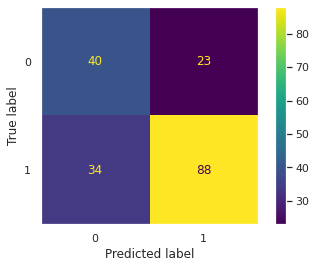


Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accuracy: 0.692
Accurac

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from prettytable import PrettyTable

#features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
X_test_selection = X_test[best_features]

# Use the best performance model during training and validation on test dataset
clf_final.fit(X_train_selection, y_train_smt)
y_pred = clf_final.predict(X_test_selection)

t = PrettyTable(['Loan Predicted', 'Loan Status'])
for i in range(len(y_pred)):
  if y_pred[i]==0:s='No'
  elif y_pred[i]==1:s='Yes'
  #t.add_row([s, y_test[i]])
#print(t)  

print("\nConfusion Matrix:\n" )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels= clf_final.classes_)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % mean(acc)*100)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1, "\n")

print(classification_report(y_pred,y_test))


### STEP 4C - Inspect the model by visualizing and interpreting the results

Final Decision Tree:

Depth: 7 Number of leaves: 10


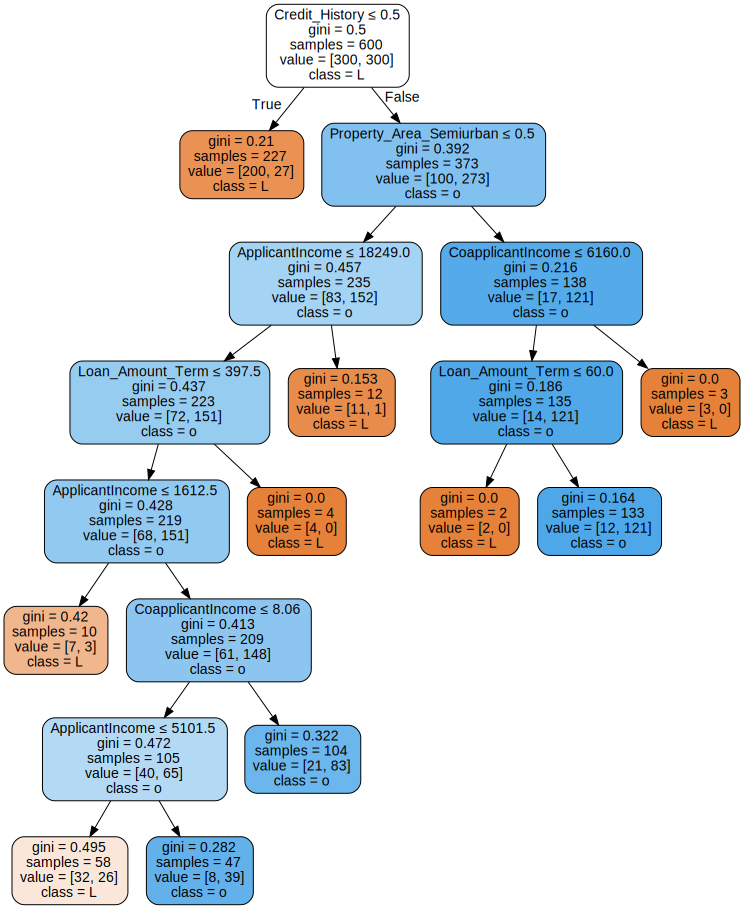

In [ ]:
print("Final Decision Tree:\n")
print("Depth:", clf_final.get_depth(), 'Number of leaves:', clf_final.get_n_leaves())


dot_data = tree.export_graphviz(clf_final, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Loan Prediction") 

dot_data = tree.export_graphviz(clf_final, out_file=None, 
                                feature_names= X_train_selection.columns,  
                                class_names= 'Loan_Status',  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

As we have already noticed analysing the raw data graphics, the credit history is the best predictor of the loan eligibility. After pruning the decision tree using the hyperparameters, these are the features selected to classify new data. The final metrics of this model show that we can reach as average accuracy of 70% with a F1-score of almost 80% for granting a loan. The most important metric for this problem is the recall, to make sure that only good quality applicants qualify for the loan. With this model we achieved 75% recall for aproving the loan. Although we did try running many experiments fine tunning the hyperparameters, we could not improve the final score for this dataset. 

## STEP 5 - Fit the **logistic regression** on the training dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std

# Implement the Transformer API to compute the mean and standard deviation on a training set 
# so as to be able to later re-apply the same transformation on the testing set.

# Create the pipeline for the scaler with Logistic Regression 
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
pipe.fit(X_train_smt, y_train_smt)  # apply scaling on training data
print("Score default LR:\t\t", pipe.score(X_train_smt, y_train_smt))

# Create the pipeline for the scaler with Logistic Regression Cross Validation
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=42))
pipeCV.fit(X_train_smt, y_train_smt)  # apply scaling on training data
print("Score default LR with CV:\t", pipeCV.score(X_train_smt, y_train_smt))

Score default LR:		 0.86
Score default LR with CV:	 0.8566666666666667


### STEP 5A - Tune hyperparameters (if any) based on the performance on the validation set or using cross-validation. Plot the hyperparameter value on the x-axis and performance metric on the y-axis.


Model 0:
+----+--------------------+
| cv |      accuracy      |
+----+--------------------+
| 2  | 0.8566666666666667 |
| 3  |        0.85        |
| 4  |        0.86        |
| 5  | 0.8566666666666667 |
| 6  |        0.86        |
| 7  | 0.8566666666666667 |
| 8  |        0.86        |
| 9  |        0.86        |
| 10 |        0.86        |
+----+--------------------+


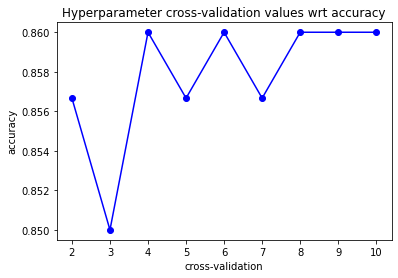

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Variables to hold hyperparameter values in test
cv=[]
acc_LRCV_metric0=[] # to hold accuracy of cv hyperparemeter for LRCV


# Model 0, tune cv hyperparameter (default is none)
print("\nModel 0:")
for n in range (2, 11):
  #print("Hyperparameter tuning: cv=", n)
  
  pipeCV0 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = n))
  pipeCV0.fit(X_train_smt, y_train_smt) 
  y_pred_0 = pipeCV0.predict(X_train_smt)
  acc_0 = accuracy_score(y_train_smt,y_pred_0)

  #print('\tAccuracy LRCV : %.3f (%.3f)' % (mean(acc_0), std(acc_0)))
  cv.append(n)
  acc_LRCV_metric0.append(mean(acc_0))


table = PrettyTable()
table.field_names = ['cv','accuracy']

for i in range(2,11):
  table.add_row([i, acc_LRCV_metric0[i-2]])

print(table)

plt.title("Hyperparameter cross-validation values wrt accuracy") 
plt.xlabel("cross-validation") 
plt.ylabel("accuracy") 
plt.plot(cv,acc_LRCV_metric0,marker='o', color='b')
plt.show()

The k= 4, 6, 8,9,10 folds cross-validation are the models with better performace when measuring accuracy. Becasue the results are the same, we decided to use k= 4 to be less computationally expensive.


Model 1:
+-----------+--------+----------+
|   solver  | LR acc | LRCV acc |
+-----------+--------+----------+
|   lbfgs   |  0.86  |   0.86   |
| newton-cg |  0.86  |   0.86   |
| liblinear |  0.86  |   0.86   |
|    sag    |  0.86  |   0.86   |
|    saga   |  0.86  |   0.86   |
+-----------+--------+----------+


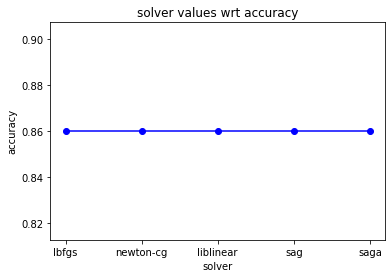

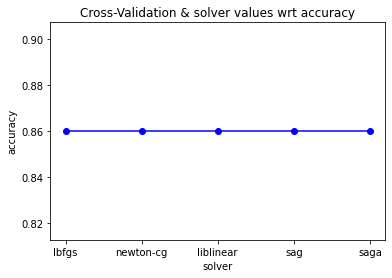

In [ ]:
acc_LR_metric1=[]     # to hold accuracy of solvers parameter for LR
acc_LRCV_metric1=[]   # to hold accuracy of solvers parameter for LRCV

# Model 1, tune solver parameter (default is lbfgs’)
print("\nModel 1:")
solvers = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
for s in solvers:
  #print("Hyperparameter tuning: solvers=", s)
  pipe1 = make_pipeline(StandardScaler(), LogisticRegression(random_state=10, solver= s))
  pipe1.fit(X_train_smt, y_train_smt)
  y_pred1 = pipe1.predict(X_train_smt)
  acc1 = accuracy_score(y_train_smt,y_pred1)
  
  pipeCV1 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv=4, solver= s))
  pipeCV1.fit(X_train_smt, y_train_smt) 
  y_pred_1 = pipeCV1.predict(X_train_smt)
  acc_1 = accuracy_score(y_train_smt,y_pred_1)

  #print('\tAccuracy LR: %.3f (%.3f)' % (mean(acc1), std(acc1)))
  acc_LR_metric1.append(mean(acc1))
  #print('\tAccuracy LRCV : %.3f (%.3f)' % (mean(acc_1), std(acc_1)))
  acc_LRCV_metric1.append(mean(acc_1))

table = PrettyTable()
table.field_names = ['solver','LR acc', 'LRCV acc']

for i in range(len(solvers)):
  if i==0: s = 'lbfgs'
  elif i==1: s= 'newton-cg'
  elif i==2: s ='liblinear'
  elif i==3: s = 'sag'
  else: s = 'saga' 
  table.add_row([s,acc_LR_metric1[i], acc_LRCV_metric1[i]])

print(table)

plt.title("solver values wrt accuracy") 
plt.xlabel("solver") 
plt.ylabel("accuracy") 
plt.plot(solvers,acc_LR_metric1,marker='o', color='b')
plt.show()

plt.title("Cross-Validation & solver values wrt accuracy") 
plt.xlabel("solver") 
plt.ylabel("accuracy") 
plt.plot(solvers,acc_LRCV_metric1,marker='o', color='b')
plt.show()

We see that apart from 'liblinear', all other solvers ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ have the same accuracy when using CV. Since our data set is small, ‘newton-cg’ and 'lbfgs' are appropriate to use. We decided to choose 'lbfgs', the default solver, because it only stores the last few updates and saves memory.


Model 2:
+----------------+----------+
| max_iterations | Accuracy |
+----------------+----------+
|      100       |   0.86   |
|      500       |   0.86   |
|      1000      |   0.86   |
|      2000      |   0.86   |
|      5000      |   0.86   |
|     10000      |   0.86   |
+----------------+----------+


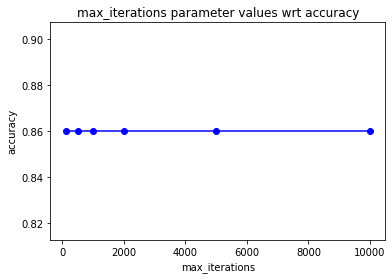

In [ ]:
warm_start = [False, True]
acc_mi_metric=[]     # to hold accuracy of solvers paremeter for max_iterations
max_iterations=[]
table = PrettyTable()
table.field_names = ['max_iterations','Accuracy']
# Model 2, tune max_iterations  (default is 100)
print("\nModel 2:")
for n in [100, 500, 1000, 2000, 5000, 10000]:
  pipeCV2 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv=8, max_iter= n))
  pipeCV2.fit(X_train_smt, y_train_smt) 
  y_pred_2 = pipeCV2.predict(X_train_smt)
  acc_2 = accuracy_score(y_train_smt,y_pred_2)
  acc_mi_metric.append(mean(acc_2))
  max_iterations.append(n)
  table.add_row([n,mean(acc_2)])
 # print('\tAccuracy LRCV %.0f max_iter: %.3f (%.3f)' % (n, mean(acc_2), std(acc_2)))
  
print(table)

plt.title("max_iterations parameter values wrt accuracy") 
plt.xlabel("max_iterations") 
plt.ylabel("accuracy") 
plt.plot(max_iterations,acc_mi_metric,marker='o', color='b')
plt.show()

Based on the results of the tests above, we decided on the following hyperparameters values:

cv = 8-fold and 
default solver 'lbfgs'

In [ ]:
from sklearn.model_selection import cross_val_score

# Use the best model : 2  (max_iter = 1000)
scores = cross_val_score(pipeCV1, X_train_smt, y_train_smt)
print('Model 2 Scores: %.3f (%.3f)' % (mean(scores), std(scores)))

# Model 3
pipeCV3 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 4))
pipeCV3.fit(X_train_smt, y_train_smt)
y_pred = pipeCV3.predict(X_train_smt)
acc = accuracy_score(y_train_smt,y_pred)
print('Accuracy: %.3f' % acc)

# Use the best model : 3
scores = cross_val_score(pipeCV3, X_train_smt, y_train_smt)
print('Model 3 Scores: %.3f (%.3f)' % (mean(scores), std(scores)))


Model 2 Scores: 0.832 (0.093)
Accuracy: 0.860
Model 3 Scores: 0.830 (0.093)


+----------------+--------------------+
| KBest features |      Accuracy      |
+----------------+--------------------+
|       1        |        0.49        |
|       2        |       0.515        |
|       3        | 0.7883333333333333 |
|       4        | 0.7883333333333333 |
|       5        | 0.8033333333333333 |
|       6        | 0.8033333333333333 |
|       7        | 0.7933333333333333 |
|       8        | 0.7933333333333333 |
|       9        |       0.805        |
|       10       |       0.825        |
|       11       |       0.825        |
+----------------+--------------------+


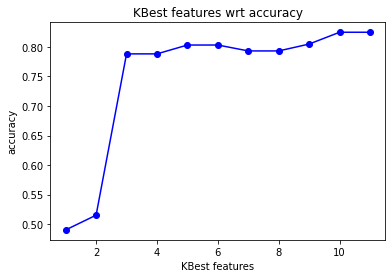

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
acc_bf_metric=[]     # to hold accuracy of solvers paremeter for max_iterations
bf=[]
table = PrettyTable()
table.field_names = ['KBest features','Accuracy']
for n in range(1,12):
  select_feature = SelectKBest(chi2, k=n).fit(X_train_smt, y_train_smt)
  X_train_2 = select_feature.transform(X_train_smt)
  pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 8))
  pipeCV.fit(X_train_2, y_train_smt)
  y_pred = pipeCV.predict(X_train_2)
  acc = accuracy_score(y_train_smt,y_pred)
  acc_bf_metric.append(mean(acc))
  bf.append(n)
  table.add_row([n,mean(acc)])
  #print('Features : ',n,' Accuracy: %.3f' % acc)

print(table)

plt.title("KBest features wrt accuracy") 
plt.xlabel("KBest features") 
plt.ylabel("accuracy") 
plt.plot(bf,acc_bf_metric,marker='o', color='b')
plt.show()

In [ ]:
select_feature = SelectKBest(chi2, k=10).fit(X_train_smt, y_train_smt)
X_train_2 = select_feature.transform(X_train_smt)
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 8))
pipeCV.fit(X_train_2, y_train_smt)
y_pred = pipeCV.predict(X_train_2)
acc = accuracy_score(y_train_smt,y_pred)
print(acc)

0.825


In [ ]:
features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
X_train_selection = X_train_smt[features]
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 8))
pipeCV.fit(X_train_selection, y_train_smt)
y_pred = pipeCV.predict(X_train_selection)
acc = accuracy_score(y_train_smt,y_pred)
print(acc)

0.7883333333333333


### STEP 5B - Evaluate it on test data and generate a classification report 

Model Evaluation: 
*   Confusion Matrix ->  Cij is equal to the number of observations known to be in group 'i' and predicted to be in group 'j'. Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class
*   Accuracy -> a fraction of correctly classified samples over the total samples on dataset (% total correct predictions)
*   F1 score -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 ( F1 = 2 * (precision * recall) / (precision + recall) ) 
* Precision -> the fraction of correctly classified positive over the total predicted positive (measures how precise the predictions are)
* Recall -> the fraction of correctly classified positive over the total true positive (indicates what percentage of the classes we’re interested in were actually captured by the model)


Confusion Matrix:



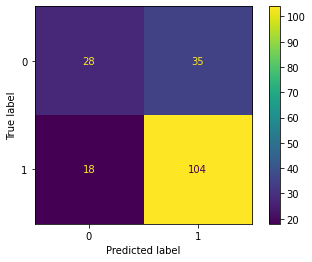


Accuracy: 0.714

F1 score:  [0.51376147 0.79693487]
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        46
           1       0.85      0.75      0.80       139

    accuracy                           0.71       185
   macro avg       0.65      0.68      0.66       185
weighted avg       0.75      0.71      0.73       185



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report

# Best model: default solver 'lbfgs', and cv = 8-fold
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 4))
pipeCV.fit(X_train_smt, y_train_smt)
y_pred = pipeCV.predict(X_test)

print("\nConfusion Matrix:\n" )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score: ",  f1)

print(classification_report(y_pred,y_test))


Confusion Matrix:



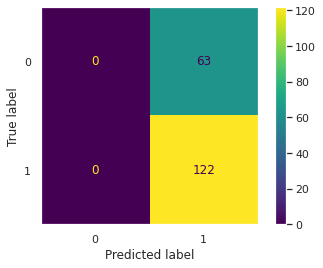


Accuracy: 0.659

F1 score:  [0.         0.79478827]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.66      0.79       185

    accuracy                           0.66       185
   macro avg       0.50      0.33      0.40       185
weighted avg       1.00      0.66      0.79       185



In [ ]:

from prettytable import PrettyTable

# Use the best performance model during training and validation on test dataset selecting k best
select_feature_train = SelectKBest(chi2, k=10).fit(X_train_smt, y_train_smt)
X_train_2 = select_feature_train.transform(X_train_smt)
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 8))
pipeCV.fit(X_train_2, y_train_smt)

select_feature_test = SelectKBest(chi2, k=10).fit(X_test, y_test)
X_test_2 = select_feature_test.transform(X_test)
y_pred = pipeCV.predict(X_test_2)

print("\nConfusion Matrix:\n" )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score: ",  f1)

#p=precision_score(y_test, y_pred)
#print("\nprecision_score: %.3f" % p)

#r=recall_score(y_test, y_pred)
#print("\nrecall_score: %.3f \n" % r)

print(classification_report(y_pred,y_test))

In [ ]:
features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
X_train_selection = X_train_smt[features]
pipeCV = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=10, cv = 8))
pipeCV.fit(X_train_selection, y_train_smt)

X_test_selection = X_test[features]
y_pred = pipeCV.predict(X_test_selection)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7027027027027027


## STEP 6 - Fit the **random forest** on the training dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clfG = RandomForestClassifier()   
rf_clfG.fit(X_train_smt,y_train_smt)
y_predG = rf_clfG.predict(X_train_smt)
accG=accuracy_score(y_train_smt,y_predG)
print(accG)

1.0


### STEP 6B - Tune Hyperparameters

In [ ]:
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
count={}
rfc = RandomForestClassifier()
for i in range(100):
  forest_params = [{'criterion':['entropy','gini'],'n_estimators': list(range(10, 120,10))}]
  clf = GridSearchCV(rfc, forest_params, cv = 6, scoring='accuracy')
  clf.fit(X_train_smt, y_train_smt)
  if clf.best_params_['criterion'] in count:
    count[clf.best_params_['criterion']]+=1
  else:
    count[clf.best_params_['criterion']]=1
  if clf.best_params_['n_estimators'] in count:
    count[clf.best_params_['n_estimators']]+=1
  else:
    count[clf.best_params_['n_estimators']]=1
print(count)

{'gini': 43, 70: 7, 'entropy': 57, 90: 9, 30: 15, 110: 10, 100: 5, 20: 11, 50: 10, 60: 8, 40: 17, 80: 7, 10: 1}


Considering the most commonly returned hyperparameter values by gridsearchcv - 
{'criterion': 'entropy', 'n_estimators': 100}. Though 50 was the most common for n_estimators, in practice 100 gives better results and it was the second most common.

even though we have found our hyperparameter values, we will still explore and plot the accuracies for different types and values of hyperparameters

In [ ]:
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.model_selection import KFold,cross_val_score

# Compare performance of Gini and Entropy hyperparameters
rf_clfE = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_clfE.fit(X_train_smt, y_train_smt)
y_predE = rf_clfE.predict(X_train_smt)
accE=accuracy_score(y_train_smt,y_predE)

print("Accuracy without cross-validation ",accE)
rf_clfG = RandomForestClassifier(criterion='gini')   
rf_clfG.fit(X_train_smt,y_train_smt)


table = PrettyTable()
table.field_names = ['cv','Gini', 'Entropy',]
# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scoresG = cross_val_score(rf_clfG, X_train_smt, y_train_smt, scoring='accuracy', cv=kf, n_jobs=-1)
  scoresE = cross_val_score(rf_clfE, X_train_smt, y_train_smt, scoring='accuracy', cv=kf, n_jobs=-1)
  table.add_row([n, mean(scoresG), mean(scoresE), ])

print(table)

Accuracy without cross-validation  1.0
+----+--------------------+--------------------+
| cv |        Gini        |      Entropy       |
+----+--------------------+--------------------+
| 2  | 0.8183333333333334 |       0.825        |
| 3  | 0.8216666666666667 | 0.8216666666666667 |
| 4  | 0.8216666666666667 | 0.8266666666666667 |
| 5  | 0.8283333333333334 |       0.825        |
| 6  | 0.8266666666666665 |       0.835        |
| 7  | 0.8200703537228844 | 0.8300957592339261 |
| 8  | 0.8333333333333334 | 0.8283333333333334 |
| 9  | 0.8317000854314286 | 0.824966078697422  |
| 10 | 0.8266666666666665 |       0.825        |
+----+--------------------+--------------------+


k=6


Model 1:
+--------------+--------------------+----------------------+
| n_estimators |      Accuracy      |         std          |
+--------------+--------------------+----------------------+
|      10      | 0.8016666666666666 | 0.04450343307606229  |
|      20      | 0.8083333333333332 | 0.03578485092263979  |
|      30      | 0.8233333333333334 | 0.03349958540373628  |
|      40      | 0.8333333333333334 | 0.024267032964268385 |
|      50      |        0.83        | 0.029999999999999985 |
|      60      | 0.8366666666666668 | 0.023570226039551556 |
|      70      | 0.8250000000000001 | 0.04072263907623538  |
|      80      | 0.8316666666666667 | 0.022669117514559058 |
|      90      |       0.815        | 0.034034296427770214 |
|     100      | 0.8316666666666667 | 0.03715582801601324  |
|     110      | 0.8266666666666667 | 0.030912061651652323 |
+--------------+--------------------+----------------------+


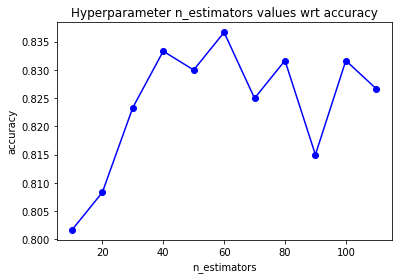


Model 2:
+--------------+--------------------+----------------------+
| max_features |      Accuracy      |         std          |
+--------------+--------------------+----------------------+
|     sqrt     | 0.8316666666666667 | 0.021147629234082508 |
|     log2     | 0.8266666666666667 | 0.023570226039551556 |
|     auto     | 0.8233333333333334 |  0.025603819159562   |
+--------------+--------------------+----------------------+


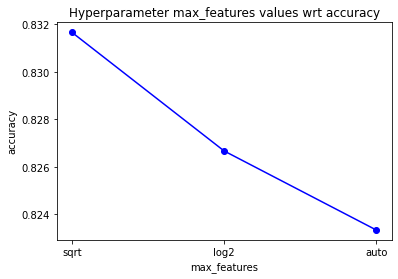


Model 3:
+------------------+--------------------+----------------------+
| min_samples_leaf |      Accuracy      |         std          |
+------------------+--------------------+----------------------+
|        1         | 0.8316666666666667 | 0.036247605284885895 |
|        2         | 0.8316666666666666 | 0.020344259359556142 |
|        3         | 0.8300000000000001 | 0.03214550253664317  |
|        4         | 0.8333333333333334 | 0.02357022603955157  |
|        5         | 0.8316666666666667 | 0.021147629234082515 |
|        6         | 0.8383333333333333 | 0.024776781245530836 |
|        7         | 0.8283333333333333 | 0.03435921354681382  |
|        8         | 0.8300000000000001 | 0.032659863237109024 |
|        9         | 0.8250000000000001 | 0.030956959368344503 |
|        10        | 0.8216666666666667 | 0.03387066905483594  |
+------------------+--------------------+----------------------+


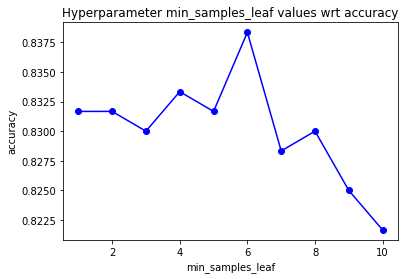


Model 4:
+-----------+--------------------+----------------------+
| max_depth |      Accuracy      |         std          |
+-----------+--------------------+----------------------+
|     2     | 0.8066666666666666 | 0.04459696053419883  |
|     3     | 0.7983333333333333 | 0.04297932319409208  |
|     4     | 0.8233333333333333 | 0.04714045207910316  |
|     5     | 0.8249999999999998 |  0.0419324854180304  |
|     6     |        0.82        | 0.03999999999999999  |
|     7     | 0.8316666666666667 | 0.027938424357066994 |
|     8     | 0.8283333333333333 | 0.03578485092263979  |
|     9     | 0.8350000000000001 | 0.028136571693556864 |
|     10    | 0.8333333333333334 | 0.037712361663282526 |
|     11    |        0.83        | 0.031091263510296032 |
|     12    |        0.83        | 0.02516611478423581  |
|     13    | 0.8216666666666668 | 0.033374973990834625 |
|     14    | 0.8250000000000001 | 0.03730504880933231  |
|     15    | 0.8283333333333333 | 0.03387066905483594  |
|   

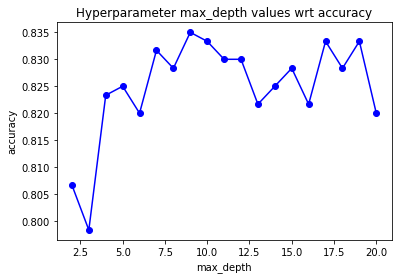

In [ ]:
import matplotlib.pyplot as plt
# Variables to hold hyperparameter values in test
n_estimators=[]
acc_metric1=[]  # to hold accuracy of n_estimators hyperparemeter
max_features=[]
acc_metric2=[] # to hold accuracy of max_features hyperparemeter
min_samples_leaf=[]
acc_metric3=[] # to hold accuracy of min_sample_leaf hyperparemeter
max_depth=[]
acc_metric4=[] # to hold accuracy of max_depth hyperparemeter

#kf = KFold(random_state=10, shuffle=True, n_splits= 9) # 9 fold gives high accuracy on Entropy and Gini
kf = KFold(random_state=10, shuffle=True, n_splits= 6)
# Model 1, tune n_estimators hyperparameter
print("\nModel 1:")
table1 = PrettyTable()
table1.field_names = ['n_estimators','Accuracy', 'std']
for n in range (10, 120,10):
    clf = RandomForestClassifier(criterion='entropy', n_estimators=n)
    scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=kf)
    n_estimators.append(n)
    acc_metric1.append(mean(scores))
    table1.add_row([n, mean(scores), std(scores)])

print(table1)

plt.title("Hyperparameter n_estimators values wrt accuracy") 
plt.xlabel("n_estimators") 
plt.ylabel("accuracy") 
plt.plot(n_estimators,acc_metric1,marker='o', color='b')
plt.show()

#Model 2, tune max_features hyperparameter
print("\nModel 2:")
table2 = PrettyTable()
table2.field_names = ['max_features','Accuracy', 'std']
for n in {'auto', 'sqrt', 'log2'}:
    clf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=n)
    scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=kf)
    max_features.append(n)
    acc_metric2.append(mean(scores))
    table2.add_row([n, mean(scores), std(scores)])

print(table2)

plt.title("Hyperparameter max_features values wrt accuracy") 
plt.xlabel("max_features") 
plt.ylabel("accuracy") 
plt.plot(max_features,acc_metric2,marker='o', color='b')
plt.show()

# Model 3, tune min_samples_leaf hyperparameter
print("\nModel 3:")
table3 = PrettyTable()
table3.field_names = ['min_samples_leaf','Accuracy', 'std']
for n in range (1, 11):
    clf = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_leaf=n)
    #clf = RandomForestClassifier(criterion='entropy', min_samples_leaf=n)
    scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=kf)
    min_samples_leaf.append(n)
    acc_metric3.append(mean(scores))
    table3.add_row([n, mean(scores), std(scores)])

print(table3)

plt.title("Hyperparameter min_samples_leaf values wrt accuracy") 
plt.xlabel("min_samples_leaf") 
plt.ylabel("accuracy") 
plt.plot(min_samples_leaf,acc_metric3,marker='o', color='b')
plt.show()

# Model 4, tune max_depth hyperparameter
print("\nModel 4:")
table4 = PrettyTable()
table4.field_names = ['max_depth','Accuracy', 'std']
for n in range (2, 21):
    clf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=n)
    #clf = RandomForestClassifier(criterion='entropy', max_depth=n)
    scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=kf)
    max_depth.append(n)
    acc_metric4.append(mean(scores))
    table4.add_row([n, mean(scores), std(scores)])

print(table4)

plt.title("Hyperparameter max_depth values wrt accuracy") 
plt.xlabel("max_depth") 
plt.ylabel("accuracy") 
plt.plot(max_depth,acc_metric4,marker='o', color='b')
plt.show()

to reduce overtuning we only use 
n_estimators = 100
criterion=entropy


In [ ]:
from numpy import mean,std
from sklearn.model_selection import KFold,cross_val_score
clf = RandomForestClassifier(criterion='entropy', n_estimators=100)
scores = cross_val_score(clf, X_train_smt, y_train_smt, cv=6)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.810 (0.092)


+-------------------------+----------------------+
|         Feature         |      Importance      |
+-------------------------+----------------------+
|          Gender         | 0.019133375792773757 |
|         Married         | 0.04040988254089439  |
|        Education        | 0.03378183103003774  |
|      Self_Employed      | 0.022222751116985004 |
|     ApplicantIncome     | 0.16949034664605367  |
|    CoapplicantIncome    | 0.10002239764967548  |
|        LoanAmount       | 0.15797938774193643  |
|     Loan_Amount_Term    | 0.043609865705157375 |
|      Credit_History     | 0.22969906344603652  |
|       Dependents_0      | 0.030030462252917584 |
|       Dependents_1      | 0.019247046333245248 |
|       Dependents_2      | 0.021489552673721976 |
|      Dependents_3+      | 0.008270075299424723 |
|   Property_Area_Rural   |  0.0232452431826823  |
| Property_Area_Semiurban | 0.055412520317052946 |
|   Property_Area_Urban   | 0.025956198271404947 |
+-------------------------+----

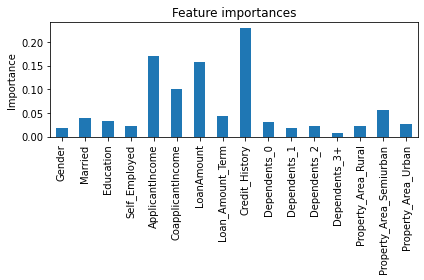

In [ ]:
feat_names = X.columns

# define the model
model = RandomForestClassifier(criterion='entropy', n_estimators=100)
# fit the model
model.fit(X_train_smt, y_train_smt)
# get importances
importances = model.feature_importances_

# summarize feature importances in a table
table6 = PrettyTable()
table6.field_names = ['Feature','Importance']
for i,v in enumerate(importances):
  table6.add_row([feat_names[i], v])
print(table6)

# plot feature importances
tree_importances = pd.Series(importances, index=feat_names)
fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")
fig.tight_layout()

Index(['LoanAmount', 'Credit_History'], dtype='object')
Index(['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome'], dtype='object')
Index(['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term'],
      dtype='object')
Index(['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Property_Area_Rural'],
      dtype='object')
Index(['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Property_Area_Rural', 'Gender'],
      dtype='object')
Index(['LoanAmount', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Property_Area_Rural', 'Gender', 'Married'],
      dtype='object')
+------------------------------------------------------------------------------------------------------------------------------------------+--------------------+----------------------+
|                                              

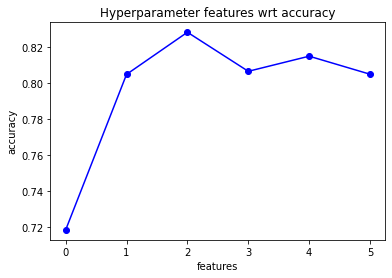

In [ ]:
features_names = [['LoanAmount','Credit_History'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Rural'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Rural','Gender'],
                  ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area_Rural','Gender','Married']]

feature_importance=[]
acc_metric0=[]

table6b = PrettyTable()
table6b.field_names = ['Features','Accuracy', 'std']
for feature in features_names:
    clf_RF = RandomForestClassifier(criterion='entropy', n_estimators=100 )
    X_train_selection = X_train_smt[feature]
    print(X_train_selection.columns)
    scores = cross_val_score(clf, X_train_selection, y_train_smt, cv=6)
    feature_importance.append(feature)
    acc_metric0.append(mean(scores))
    table6b.add_row([feature, mean(scores), std(scores)])

print(table6b)

plt.title("Hyperparameter features wrt accuracy") 
plt.xlabel("features") 
plt.ylabel("accuracy") 
plt.plot(acc_metric0,marker='o', color='b') #[i in len(features_names)]
plt.show()

In [ ]:
features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
X_train_selection = X_train_smt[features]

print(X_train_selection.shape)

clf = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf.fit(X_train_selection, y_train_smt)
y_pred = clf.predict(X_train_selection)
acc=accuracy_score(y_train_smt,y_pred)
print(acc)

(600, 5)
1.0


Model Evaluation:

Confusion Matrix -> Cij is equal to the number of observations known to be in group 'i' and predicted to be in group 'j'. Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class

Accuracy -> a fraction of correctly classified samples over the total samples on dataset (% total correct predictions)

F1 score -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 ( F1 = 2 * (precision * recall) / (precision + recall) )

Precision -> the fraction of correctly classified positive over the total predicted positive (measures how precise the predictions are)

Recall -> the fraction of correctly classified positive over the total true positive (indicates what percentage of the classes we’re interested in were actually captured by the model)

(185, 5)


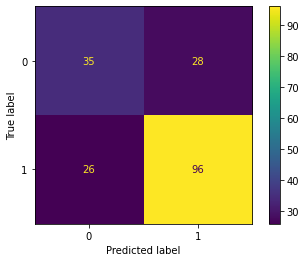


Accuracy: 0.708

F1 score: [0.56451613 0.7804878 ]
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        61
           1       0.79      0.77      0.78       124

    accuracy                           0.71       185
   macro avg       0.67      0.67      0.67       185
weighted avg       0.71      0.71      0.71       185



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report
import matplotlib.pyplot as plt
features = ['LoanAmount','Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
X_test_selection = X_test[features]

print(X_test_selection.shape)
y_pred = clf.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))